In [5]:
from __future__ import print_function

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import os

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
pd.options.display.max_columns = None


In [7]:
#os.chdir('C:/Users/sensho/Documents/Kaggle/HousingPrice')
category_df=pd.read_csv('category.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ans_df=pd.read_csv('sample_submission.csv')

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [9]:
b=['BsmtFinType1','BsmtUnfSF','TotalBsmtSF','BsmtExposure']
a=train_df[b]
a=a[a.isnull().any(axis=1)]
a.head(2)

,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,BsmtExposure
17,NaN,0,0,NaN
39,NaN,0,0,NaN


In [10]:
train_df.loc[:, "BsmtQual"] = train_df.loc[:, "BsmtQual"].fillna("No")
train_df.loc[:, "BsmtCond"] = train_df.loc[:, "BsmtCond"].fillna("No")
train_df.loc[:, "BsmtExposure"] = train_df.loc[:, "BsmtExposure"].fillna("No")
train_df.loc[:, "BsmtFinType1"] = train_df.loc[:, "BsmtFinType1"].fillna("No")
train_df.loc[:, "BsmtFinType2"] = train_df.loc[:, "BsmtFinType2"].fillna("No")
train_df.loc[:, "BsmtFullBath"] = train_df.loc[:, "BsmtFullBath"].fillna(0)
train_df.loc[:, "BsmtHalfBath"] = train_df.loc[:, "BsmtHalfBath"].fillna(0)
train_df.loc[:, "BsmtUnfSF"] = train_df.loc[:, "BsmtUnfSF"].fillna(0)
train_df.loc[:, "GarageYrBlt"] = train_df.loc[:, "GarageYrBlt"].fillna(0)

test_df.loc[:, "BsmtQual"] = test_df.loc[:, "BsmtQual"].fillna("No")
test_df.loc[:, "BsmtCond"] = test_df.loc[:, "BsmtCond"].fillna("No")
test_df.loc[:, "BsmtExposure"] = test_df.loc[:, "BsmtExposure"].fillna("No")
test_df.loc[:, "BsmtFinType1"] = test_df.loc[:, "BsmtFinType1"].fillna("No")
test_df.loc[:, "BsmtFinType2"] = test_df.loc[:, "BsmtFinType2"].fillna("No")
test_df.loc[:, "BsmtFullBath"] = test_df.loc[:, "BsmtFullBath"].fillna(0)
test_df.loc[:, "BsmtHalfBath"] = test_df.loc[:, "BsmtHalfBath"].fillna(0)
test_df.loc[:, "BsmtUnfSF"] = test_df.loc[:, "BsmtUnfSF"].fillna(0)
test_df.loc[:, "GarageYrBlt"] = test_df.loc[:, "GarageYrBlt"].fillna(0)

In [11]:
b=['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond','GarageArea']
a=train_df[b]
a=a[a.isnull().any(axis=1)]
a.head(1)

,GarageQual,GarageFinish,GarageYrBlt,GarageType,GarageCond,GarageArea
39,NaN,NaN,0.0,NaN,NaN,0


In [12]:
train_df.loc[:, "GarageType"] = train_df.loc[:, "GarageType"].fillna("No")
train_df.loc[:, "GarageFinish"] = train_df.loc[:, "GarageFinish"].fillna("No")
train_df.loc[:, "GarageQual"] = train_df.loc[:, "GarageQual"].fillna("No")
train_df.loc[:, "GarageCond"] = train_df.loc[:, "GarageCond"].fillna("No")
train_df.loc[:, "GarageArea"] = train_df.loc[:, "GarageArea"].fillna(0)
train_df.loc[:, "GarageCars"] = train_df.loc[:, "GarageCars"].fillna(0)

test_df.loc[:, "GarageType"] = test_df.loc[:, "GarageType"].fillna("No")
test_df.loc[:, "GarageFinish"] = test_df.loc[:, "GarageFinish"].fillna("No")
test_df.loc[:, "GarageQual"] = test_df.loc[:, "GarageQual"].fillna("No")
test_df.loc[:, "GarageCond"] = test_df.loc[:, "GarageCond"].fillna("No")
test_df.loc[:, "GarageArea"] = test_df.loc[:, "GarageArea"].fillna(0)
test_df.loc[:, "GarageCars"] = test_df.loc[:, "GarageCars"].fillna(0)

In [13]:
train_df.loc[:, "PoolQC"] = train_df.loc[:, "PoolQC"].fillna("No")
train_df.loc[:, "PoolArea"] = train_df.loc[:, "PoolArea"].fillna(0)
train_df.loc[:, "MiscFeature"] = train_df.loc[:, "MiscFeature"].fillna("No")
train_df.loc[:, "Alley"] = train_df.loc[:, "Alley"].fillna("None")
train_df.loc[:, "Fence"] = train_df.loc[:, "Fence"].fillna("No")
train_df.loc[:, "FireplaceQu"] = train_df.loc[:, "FireplaceQu"].fillna("No")
train_df.loc[:, "LotFrontage"] = train_df.loc[:, "LotFrontage"].fillna(0)
train_df.loc[:, "MasVnrType"] = train_df.loc[:, "MasVnrType"].fillna("None")
train_df.loc[:, "MasVnrArea"] = train_df.loc[:, "MasVnrArea"].fillna(0)
train_df.loc[:, "MasVnrArea"] = train_df.loc[:, "MasVnrArea"].fillna(0)

test_df.loc[:, "PoolQC"] = test_df.loc[:, "PoolQC"].fillna("No")
test_df.loc[:, "PoolArea"] = test_df.loc[:, "PoolArea"].fillna(0)
test_df.loc[:, "MiscFeature"] = test_df.loc[:, "MiscFeature"].fillna("No")
test_df.loc[:, "Alley"] = test_df.loc[:, "Alley"].fillna("None")
test_df.loc[:, "Fence"] = test_df.loc[:, "Fence"].fillna("No")
test_df.loc[:, "FireplaceQu"] = test_df.loc[:, "FireplaceQu"].fillna("No")
test_df.loc[:, "LotFrontage"] = test_df.loc[:, "LotFrontage"].fillna(0)
test_df.loc[:, "MasVnrType"] = test_df.loc[:, "MasVnrType"].fillna("None")
test_df.loc[:, "MasVnrArea"] = test_df.loc[:, "MasVnrArea"].fillna(0)
test_df.loc[:, "MasVnrArea"] = test_df.loc[:, "MasVnrArea"].fillna(0)

In [14]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
TotalBsmtSF,1,0.000685
SaleType,1,0.000685


In [15]:
test_df.loc[:, "TotalBsmtSF"] = test_df.loc[:, "TotalBsmtSF"].fillna(0)
test_df.loc[:, "BsmtFinSF2"] = test_df.loc[:, "BsmtFinSF2"].fillna(0)
test_df.loc[:, "BsmtFinSF1"] = test_df.loc[:, "BsmtFinSF1"].fillna(0)
test_df.loc[:, "Utilities"] = test_df.loc[:, "Utilities"].fillna('AllPub')
test_df.loc[:, "Functional"] = test_df.loc[:, "Functional"].fillna('Typ')
test_df.loc[:, "SaleType"] = test_df.loc[:, "SaleType"].fillna('WD')
test_df.loc[:, "Exterior2nd"] = test_df.loc[:, "Exterior2nd"].fillna('VinylSd')
test_df.loc[:, "Exterior1st"] = test_df.loc[:, "Exterior1st"].fillna('VinylSd')
test_df.loc[:, "KitchenQual"] = test_df.loc[:, "KitchenQual"].fillna('TA')
test_df.loc[:, "MSZoning"] = test_df.loc[:, "MSZoning"].fillna('RL')

In [16]:
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)

In [17]:
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
#ascending=False は'GrLivArea'の高いデータから順に並べ替えられる
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

In [18]:
#カテゴリ変数に変換　後でダミー変数にするため
train_df = train_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
train_df = train_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )


test_df = test_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
test_df = test_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

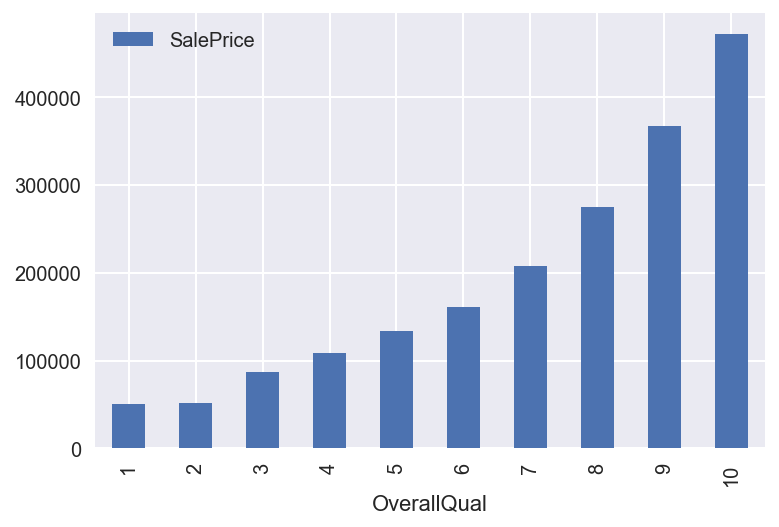

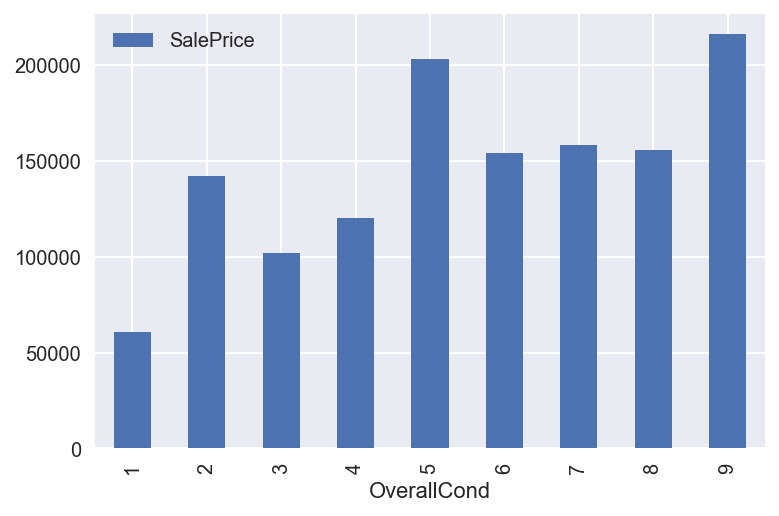

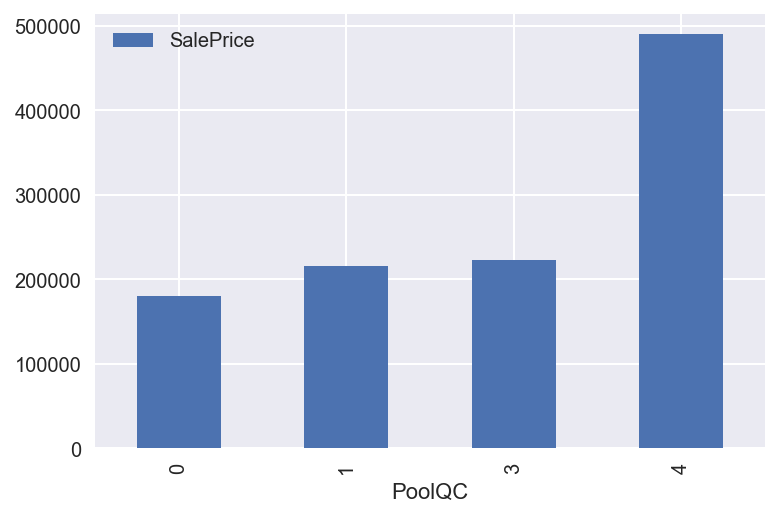

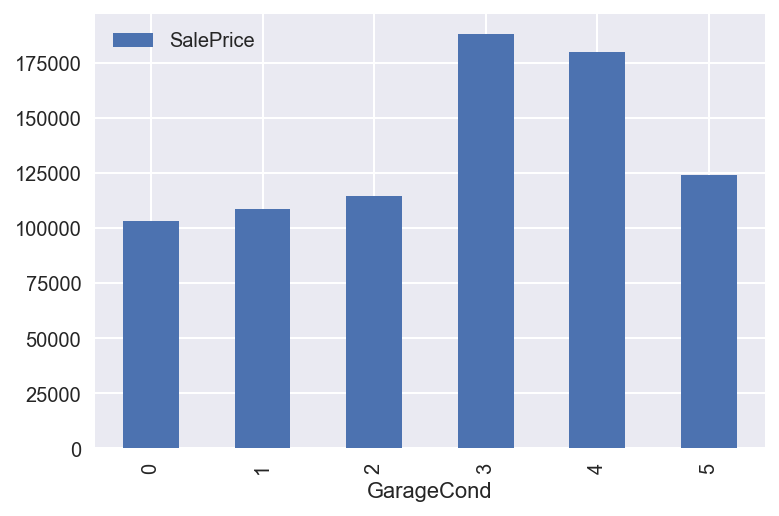

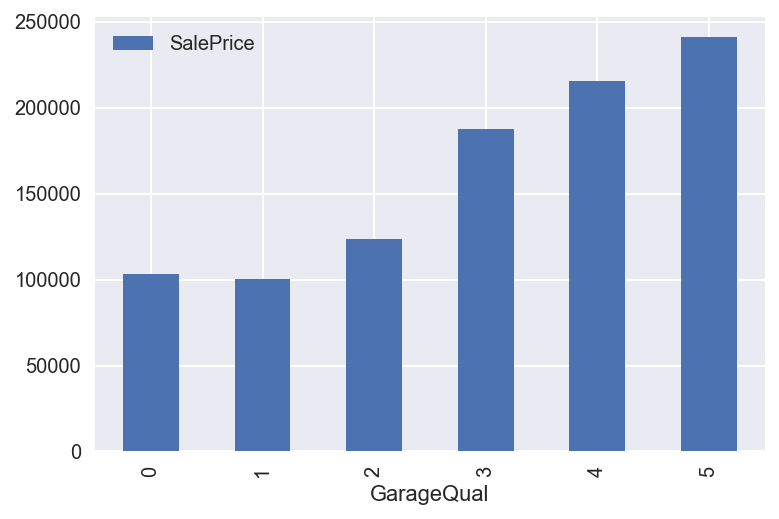

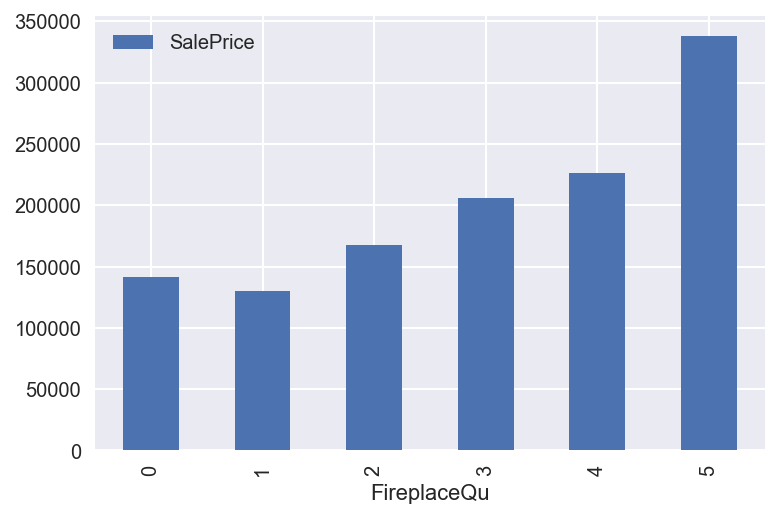

In [19]:
order_list=["OverallQual",'OverallCond','PoolQC','GarageCond','GarageQual','FireplaceQu']

for i in order_list:
    cut=train_df[[i, 'SalePrice']].groupby([i], as_index=False).mean ().sort_values(by=i, ascending=True)
    cut.plot.bar(x=i)

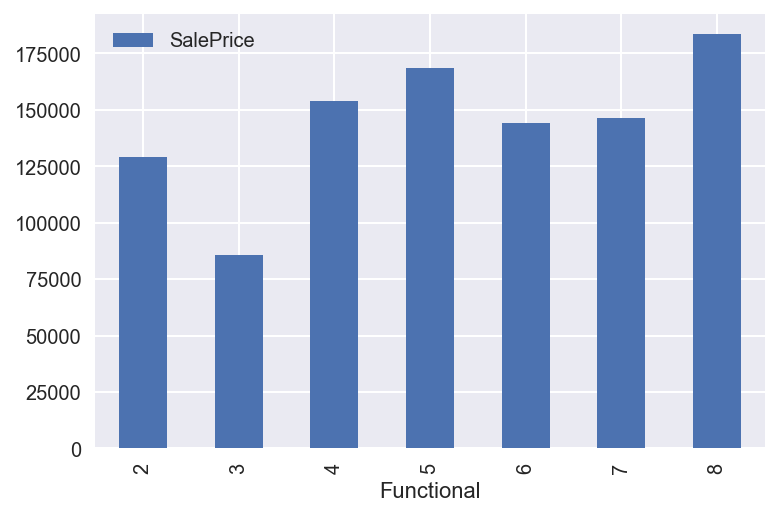

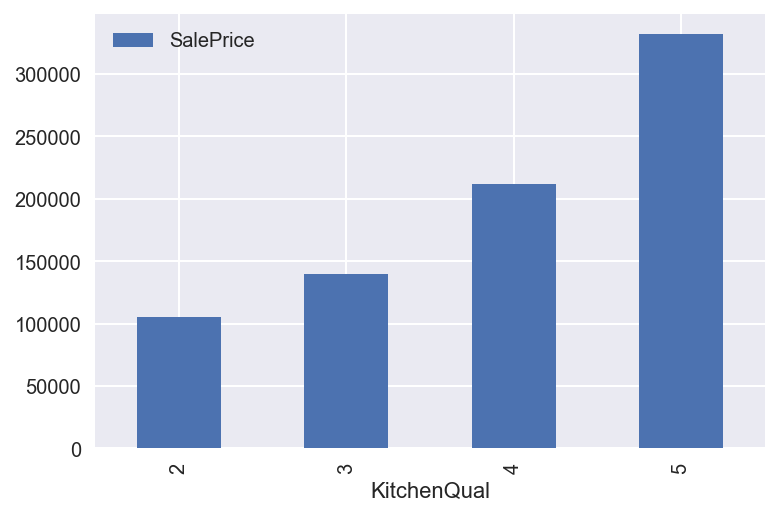

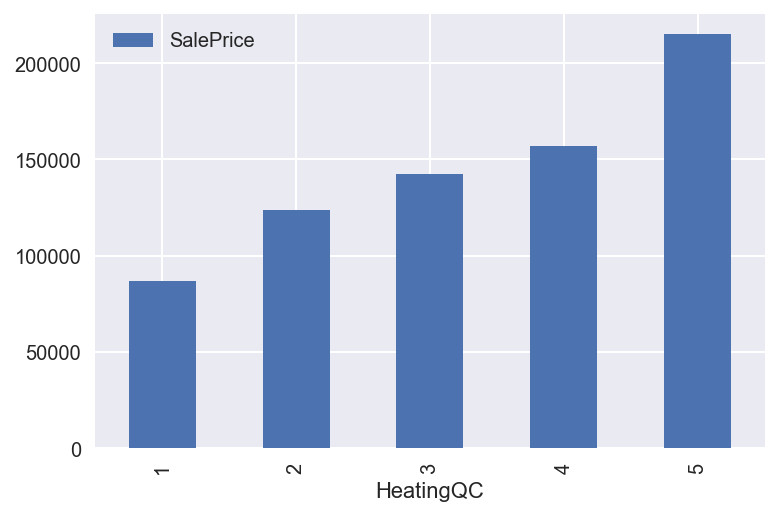

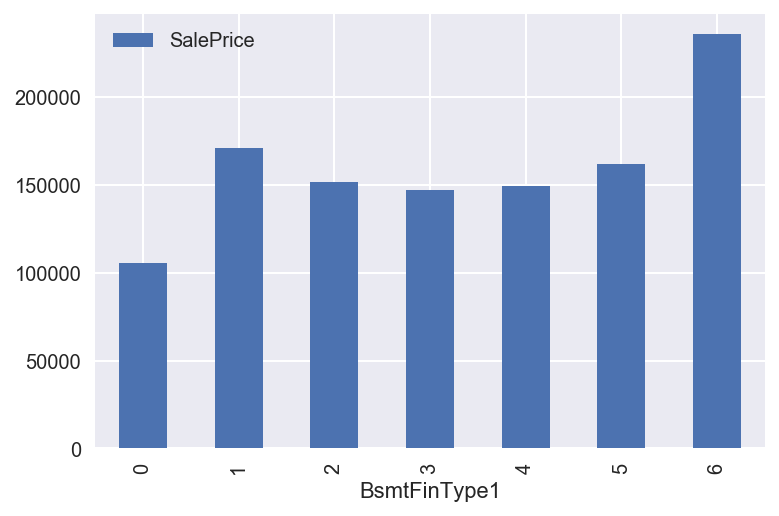

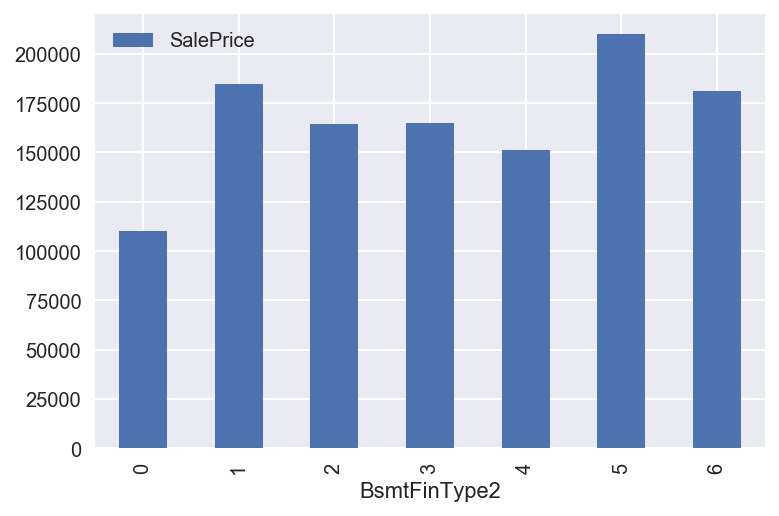

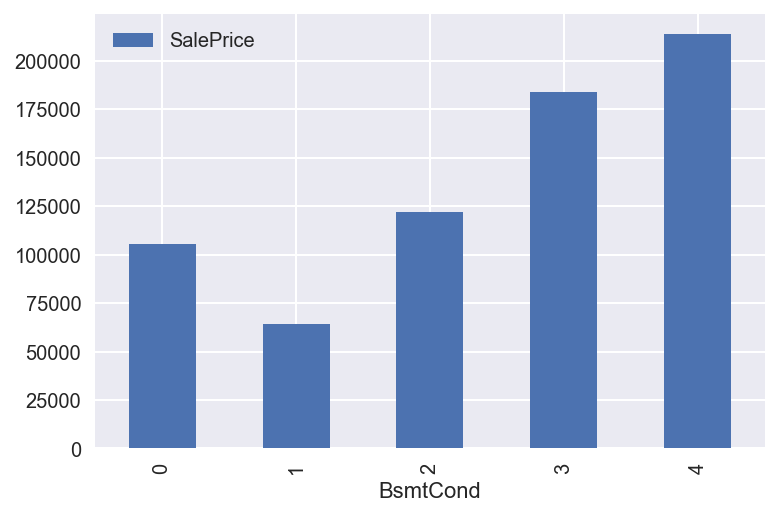

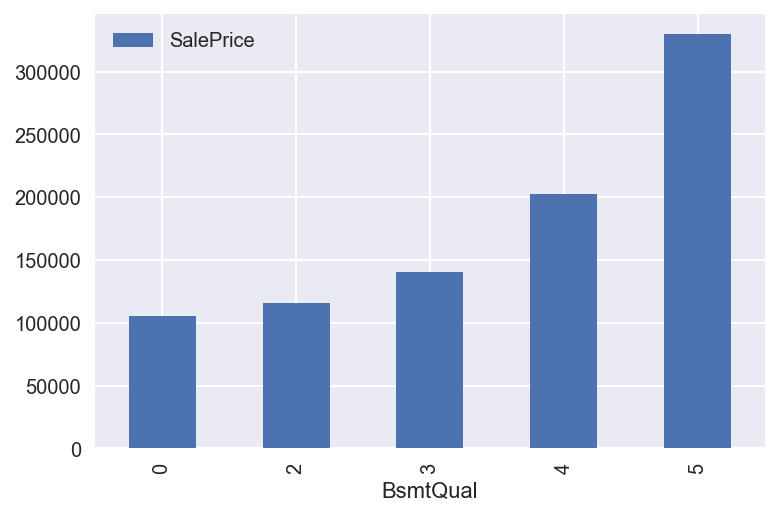

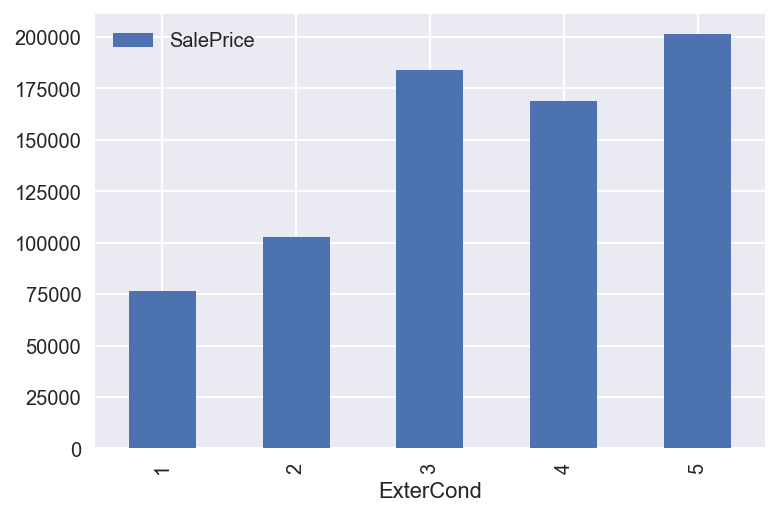

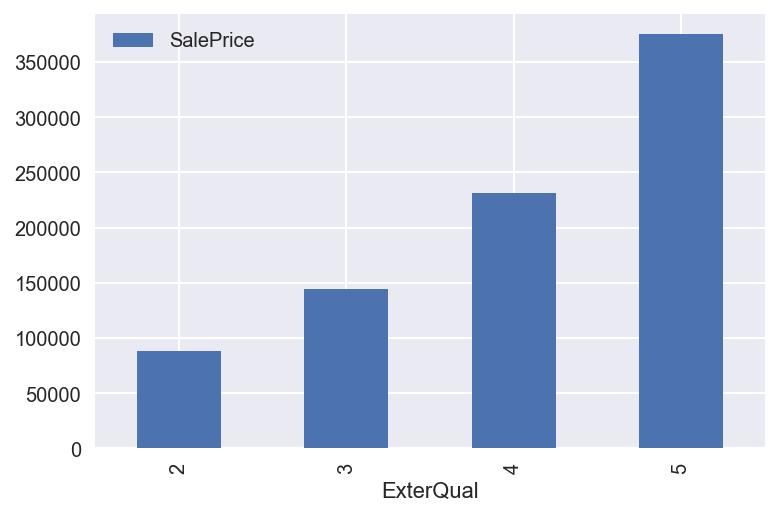

In [20]:
#順序尺度をリストに格納
order_list=['Functional','KitchenQual','HeatingQC','BsmtFinType1','BsmtFinType2','BsmtCond' 
        ,'BsmtQual','ExterCond','ExterQual']

for i in order_list:
    cut=train_df[[i, 'SalePrice']].groupby([i], as_index=False).mean ().sort_values(by=i, ascending=True)
    cut.plot.bar(x=i)

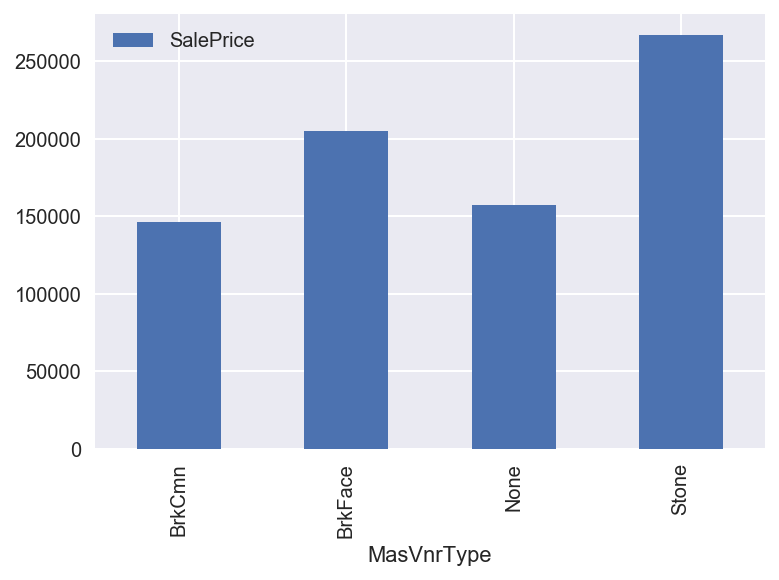

In [21]:
cut=train_df[['MasVnrType', 'SalePrice']].groupby(['MasVnrType'], as_index=False).mean ().sort_values(by='MasVnrType', ascending=True)
cut.plot.bar(x='MasVnrType')
train_df["HasMasVnr"] = train_df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})

test_df["HasMasVnr"] = test_df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})

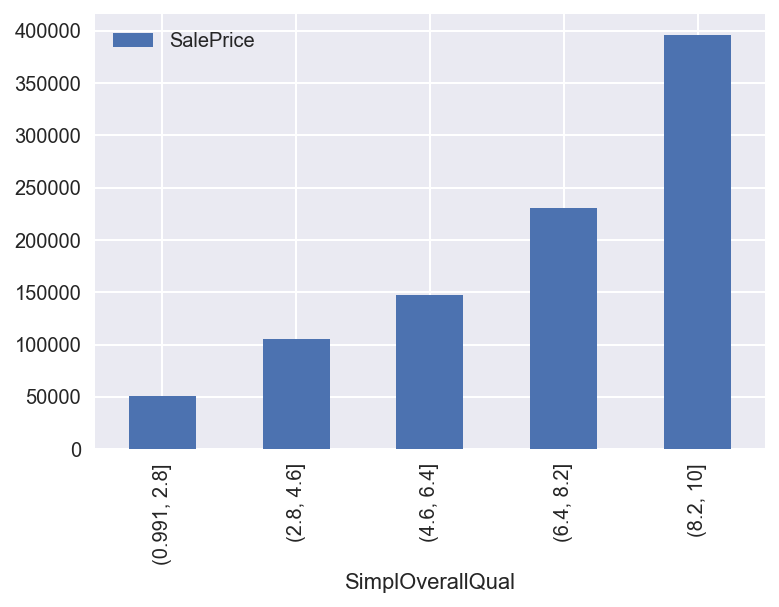

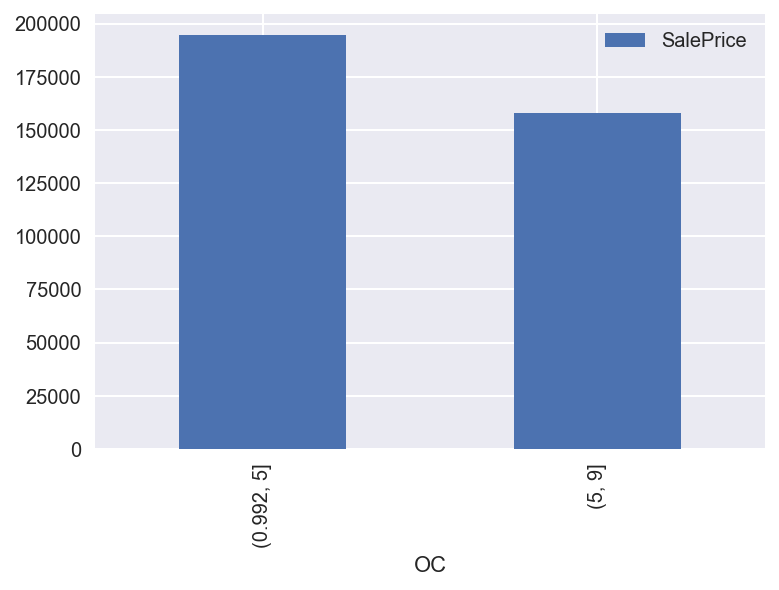

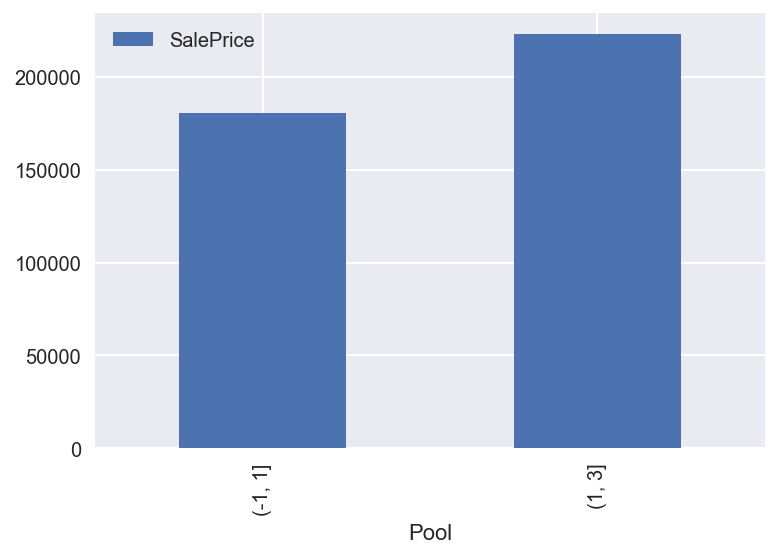

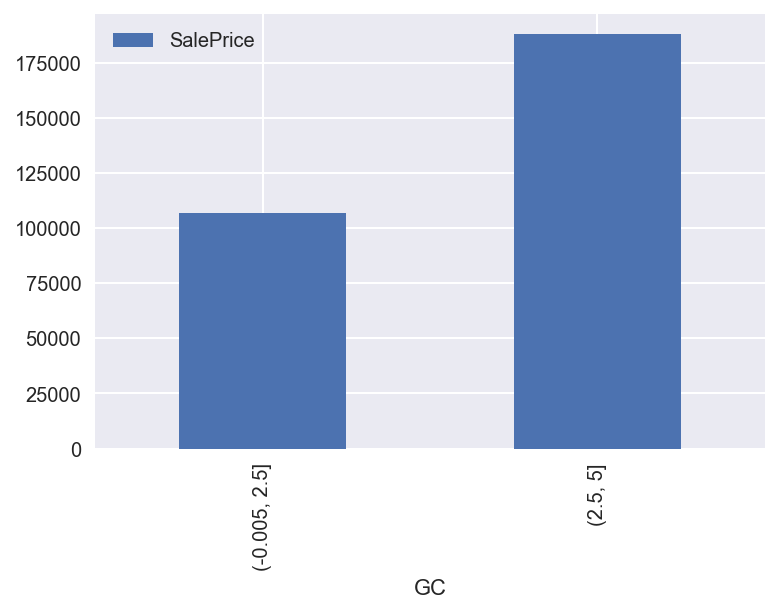

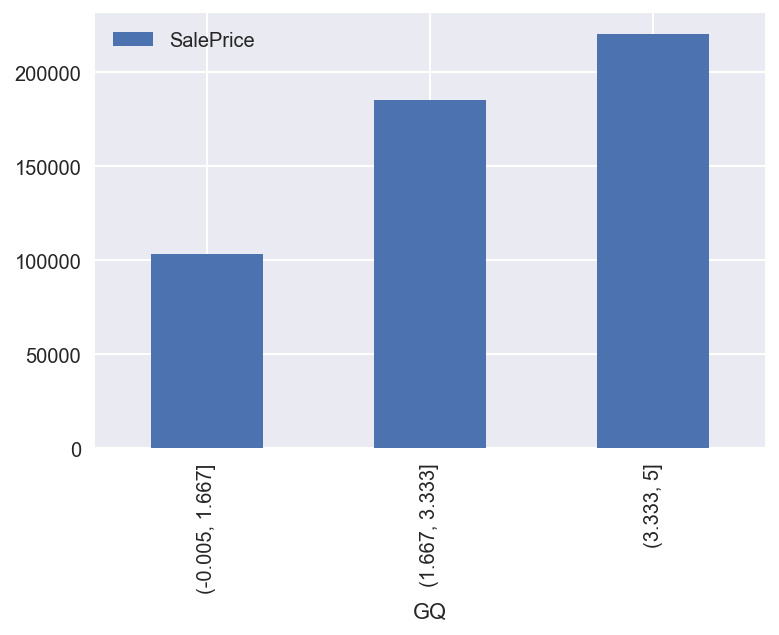

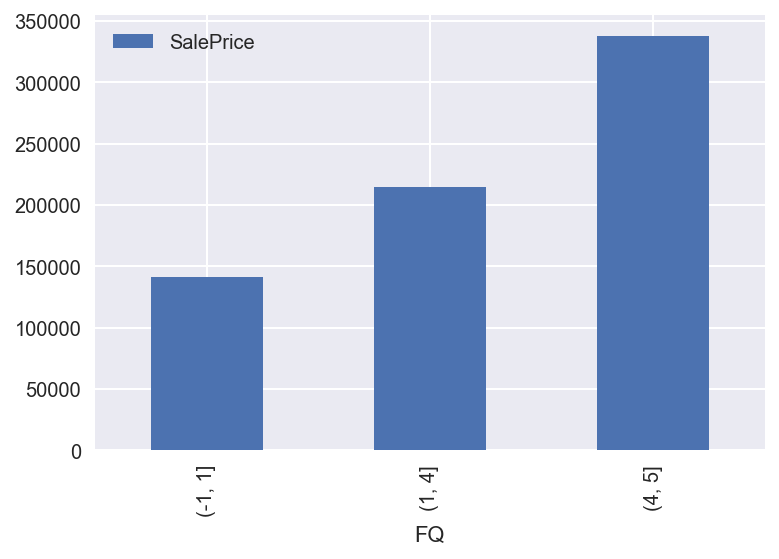

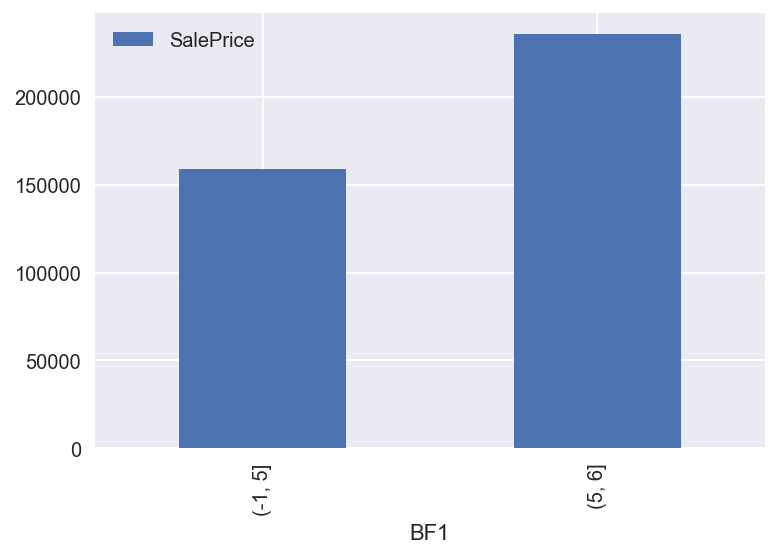

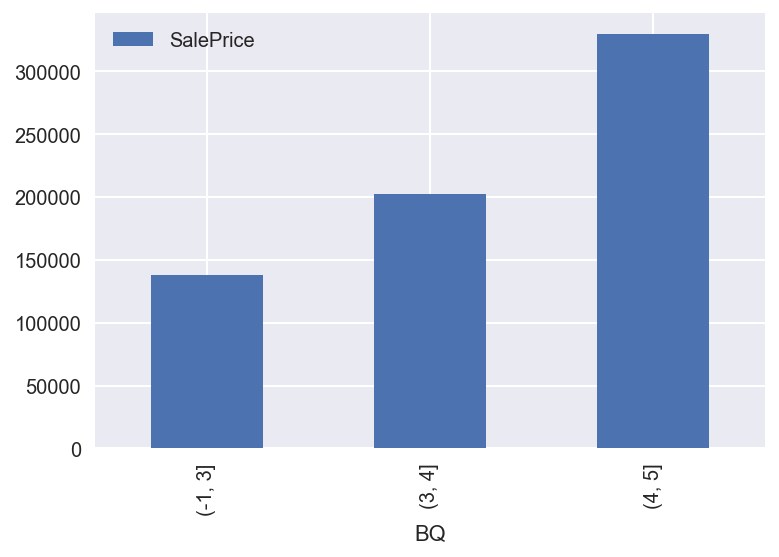

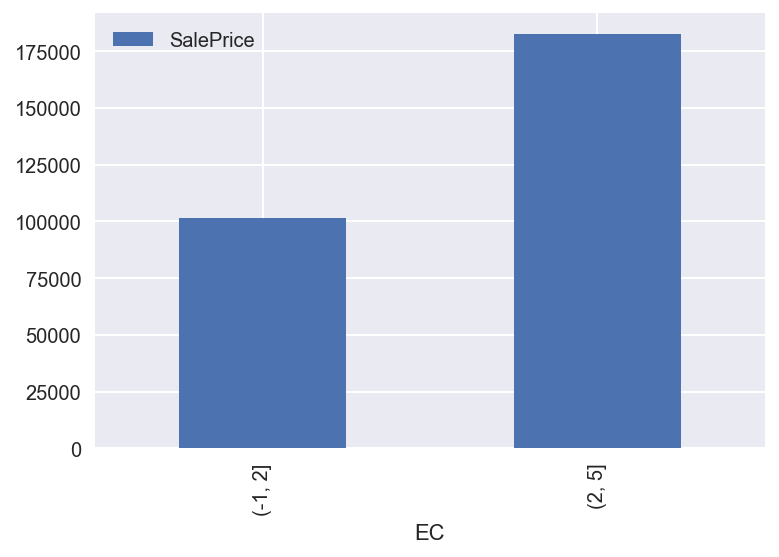

In [22]:

from scipy import stats
#pandasのデータフレームを複製したいときはコピーを必ずつける。=だけではだめ
temp_df=train_df.copy()
#５段階評価
cutnumber=list(range(0,11,2))
temp_df["SimplOverallQual"] = pd.cut (temp_df['OverallQual'],5)
cut_5=temp_df[['SimplOverallQual', 'SalePrice']].groupby(['SimplOverallQual'], as_index=False).mean ().sort_values(by='SimplOverallQual', ascending=True)
cut_5.plot.bar(x='SimplOverallQual')

cutnumber=list(range(0,11,1))
temp_df["OC"] = pd.cut (temp_df['OverallCond'],2)
cut_5=temp_df[['OC', 'SalePrice']].groupby(['OC'], as_index=False).mean ().sort_values(by='OC', ascending=True)
cut_5.plot.bar(x='OC')

cutnumber=list(range(1,4,1))
temp_df["Pool"] = pd.cut (temp_df['PoolQC'],[-1,1,3])
cut_5=temp_df[['Pool', 'SalePrice']].groupby(['Pool'], as_index=False).mean ().sort_values(by='Pool', ascending=True)
cut_5.plot.bar(x='Pool')


temp_df["GC"] = pd.cut (temp_df['GarageCond'],2)
cut_5=temp_df[['GC', 'SalePrice']].groupby(['GC'], as_index=False).mean ().sort_values(by='GC', ascending=True)
cut_5.plot.bar(x='GC')

temp_df["GQ"] = pd.cut (temp_df['GarageQual'],3)
cut_5=temp_df[['GQ', 'SalePrice']].groupby(['GQ'], as_index=False).mean ().sort_values(by='GQ', ascending=True)
cut_5.plot.bar(x='GQ')

temp_df["FQ"] = pd.cut (temp_df['FireplaceQu'],[-1,1,4,5])
cut_5=temp_df[['FQ', 'SalePrice']].groupby(['FQ'], as_index=False).mean ().sort_values(by='FQ', ascending=True)
cut_5.plot.bar(x='FQ')

temp_df["BF1"] = pd.cut (temp_df['BsmtFinType1'],[-1,5,6])
cut_5=temp_df[['BF1', 'SalePrice']].groupby(['BF1'], as_index=False).mean ().sort_values(by='BF1', ascending=True)
cut_5.plot.bar(x='BF1')

temp_df["BQ"] = pd.cut (temp_df['BsmtQual'],[-1,3,4,5])
cut_5=temp_df[['BQ', 'SalePrice']].groupby(['BQ'], as_index=False).mean ().sort_values(by='BQ', ascending=True)
cut_5.plot.bar(x='BQ')

temp_df["EC"] = pd.cut (temp_df['ExterCond'],[-1,2,5])
cut_5=temp_df[['EC', 'SalePrice']].groupby(['EC'], as_index=False).mean ().sort_values(by='EC', ascending=True)
cut_5.plot.bar(x='EC')



In [23]:
#すべて順序尺度
train_df["SimplOverallQual"] = train_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 2, # bad
                                                       4 : 2, 5 : 3, 6 : 3, # average
                                                       7 : 4, 8 : 4, 9 : 5, 10 : 5 # good
                                                      })
train_df['SimplOverallCond']=train_df.OverallCond.replace({1:1,2:1,3:1,4:1,5:1,
                                                           6:2,7:2,8:2,9:2})

train_df['SimplePoolQC']=train_df.PoolQC.replace({0:0,1:1,2:1,3:1,4:2})

train_df["SimplGarageCond"] = train_df.GarageCond.replace({0 : 0, # bad
                                                     1 : 1, 2 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train_df["SimplGarageQual"] = train_df.GarageQual.replace({0 : 0,1 : 1, # bad
                                                     2 : 2, 3 : 2, # average
                                                     4 : 3, 5 : 3 # good
                                                    })

train_df["SimplFireplaceQu"] = train_df.FireplaceQu.replace({0 : 0,1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 2, 5 : 3 # good
                                                      })

train_df["SimplBsmtFinType1"] = train_df.BsmtFinType1.replace({0:0,1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 1, 5 : 1, 6 : 2 # living quarters
                                                        })

train_df["SimplBsmtQual"] = train_df.BsmtQual.replace({0:0,1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 3 # good
                                                })

train_df["SimplExterCond"] = train_df.ExterCond.replace({0:0,1 : 1, # bad
                                                   2 : 1, 3 : 2, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

#注意：PooQCやGarageのカテゴリ変数はプールや車庫があるなしの情報は失われている
#0を1に変換しているため
#すべて順序尺度
test_df["SimplOverallQual"] = test_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 2, # bad
                                                       4 : 2, 5 : 3, 6 : 3, # average
                                                       7 : 4, 8 : 4, 9 : 5, 10 : 5 # good
                                                      })
test_df['SimplOverallCond']=test_df.OverallCond.replace({1:1,2:1,3:1,4:1,5:1,
                                                           6:2,7:2,8:2,9:2})

test_df['SimplePoolQC']=test_df.PoolQC.replace({0:0,1:1,2:1,3:1,4:2})

test_df["SimplGarageCond"] = test_df.GarageCond.replace({0 : 0, # bad
                                                     1 : 1, 2 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

test_df["SimplGarageQual"] = test_df.GarageQual.replace({0 : 0,1 : 1, # bad
                                                     2 : 2, 3 : 2, # average
                                                     4 : 3, 5 : 3 # good
                                                    })

test_df["SimplFireplaceQu"] = test_df.FireplaceQu.replace({0 : 0,1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 2, 5 : 3 # good
                                                      })

test_df["SimplBsmtFinType1"] = test_df.BsmtFinType1.replace({0:0,1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 1, 5 : 1, 6 : 2 # living quarters
                                                        })

test_df["SimplBsmtQual"] = test_df.BsmtQual.replace({0:0,1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 3 # good
                                                })

test_df["SimplExterCond"] = test_df.ExterCond.replace({0:0,1 : 1, # bad
                                                   2 : 1, 3 : 2, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

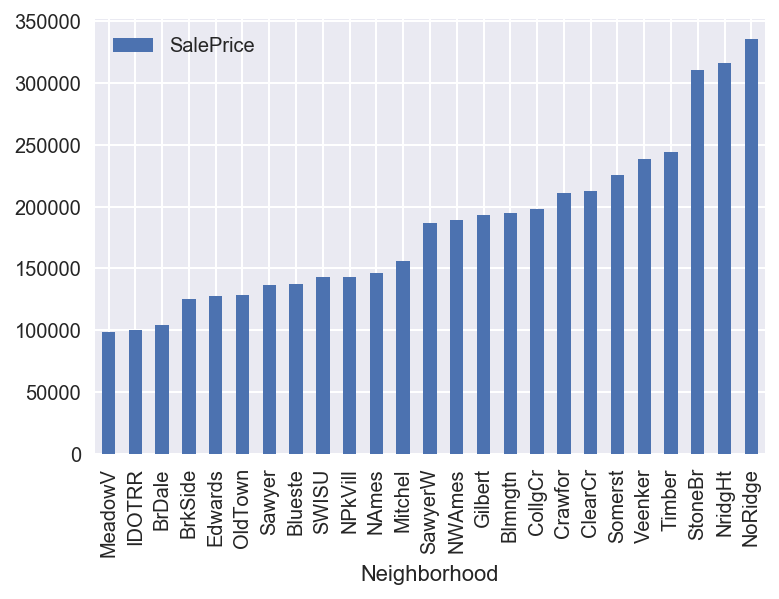

In [24]:
cut=train_df[['Neighborhood', 'SalePrice']].groupby(['Neighborhood'], as_index=False).mean ().sort_values(by='Neighborhood', ascending=True)
cut=cut.sort_values('SalePrice')
cut.plot.bar(x='Neighborhood')

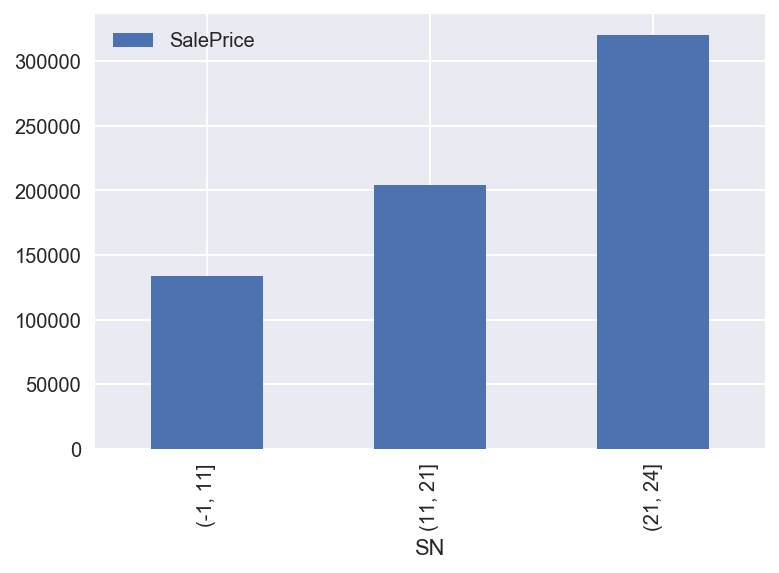

In [25]:
a={}
b=0
for col in cut['Neighborhood']:
    a[col]=b
    b+=1

train_df["SimpleNeighborhood"] = train_df.Neighborhood.replace(a)
test_df["SimpleNeighborhood"] = test_df.Neighborhood.replace(a)

train_df['SN'] = pd.cut (train_df['SimpleNeighborhood'],[-1,11,21,24])

train_df["SimpleNeighborhood"] = train_df.SimpleNeighborhood.replace({0:1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1, 
                                                   12:2,13:2,14:2,15:2,16:2,17:2,18:2,19:2,20:2,21:2, 
                                                   22:3,23:3,24:3
                                                  })

test_df["SimpleNeighborhood"] = test_df.SimpleNeighborhood.replace({0:1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1, 
                                                   12:2,13:2,14:2,15:2,16:2,17:2,18:2,19:2,20:2,21:2, 
                                                   22:3,23:3,24:3
                                                  })

cut_5=train_df[['SN', 'SalePrice']].groupby(['SN'], as_index=False).mean ().sort_values(by='SN', ascending=True)
cut_5.plot.bar(x='SN')
del train_df['SN']

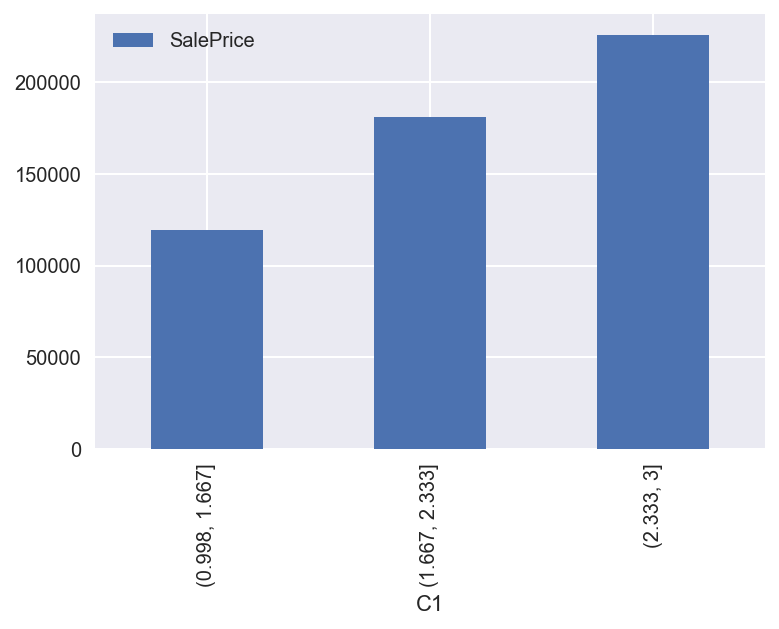

In [26]:
train_df["SimplCondition1"] = train_df.Condition1.replace({'Artery':1,'RRAn' : 1, 
                                                   'Feedr' : 1, 'Norm' : 2, 
                                                   'RRNn' : 3, 'PosN' : 3,'PosA':3,'RRNe':2,'RRAe':2
                                                  })
train_df["SimplCondition1"] = train_df.Condition2.replace({'Artery':1,'RRAn' : 1, 
                                                   'Feedr' : 1, 'Norm' : 2, 
                                                   'RRNn' : 3, 'PosN' : 3,'PosA':3,'RRNe':2,'RRAe':2
                                                  })
test_df["SimplCondition1"] = test_df.Condition1.replace({'Artery':1,'RRAn' : 1, 
                                                   'Feedr' : 1, 'Norm' : 2, 
                                                   'RRNn' : 3, 'PosN' : 3,'PosA':3,'RRNe':2,'RRAe':2
                                                  })
test_df["SimplCondition1"] = test_df.Condition2.replace({'Artery':1,'RRAn' : 1, 
                                                   'Feedr' : 1, 'Norm' : 2, 
                                                   'RRNn' : 3, 'PosN' : 3,'PosA':3,'RRNe':2,'RRAe':2
                                                  })


train_df["C1"] = pd.cut (train_df['SimplCondition1'],3)
cut_5=train_df[['C1', 'SalePrice']].groupby(['C1'], as_index=False).mean ().sort_values(by='C1', ascending=True)
cut_5.plot.bar(x='C1')
del train_df['C1']

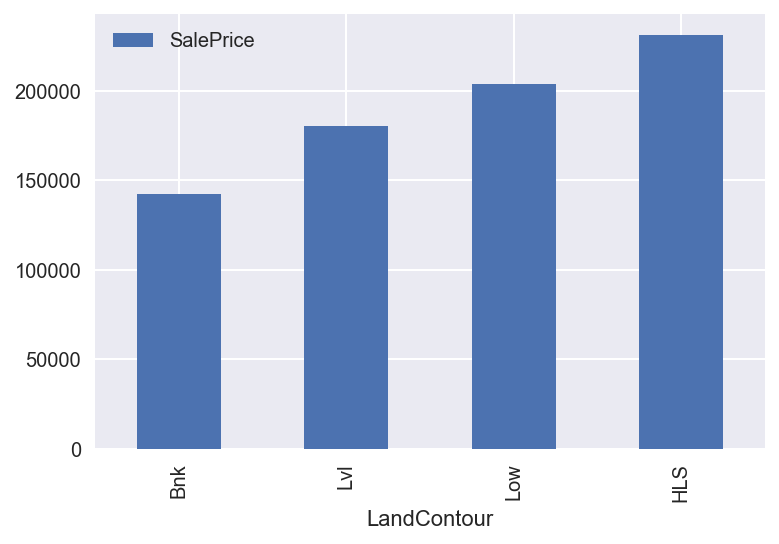

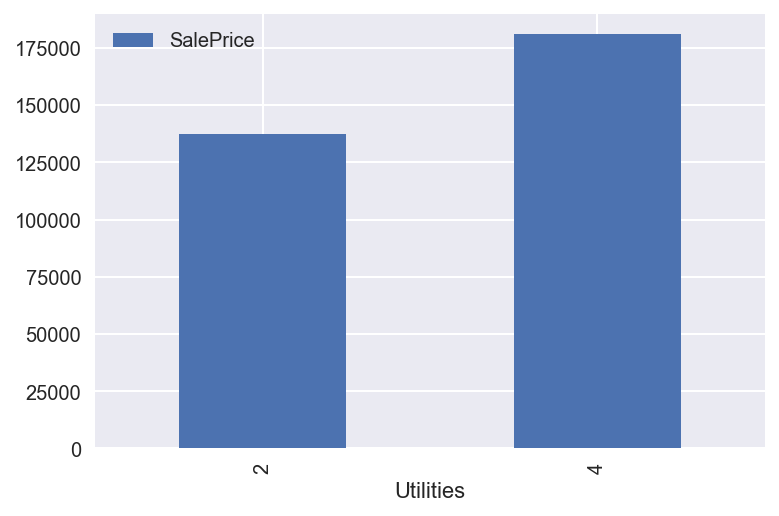

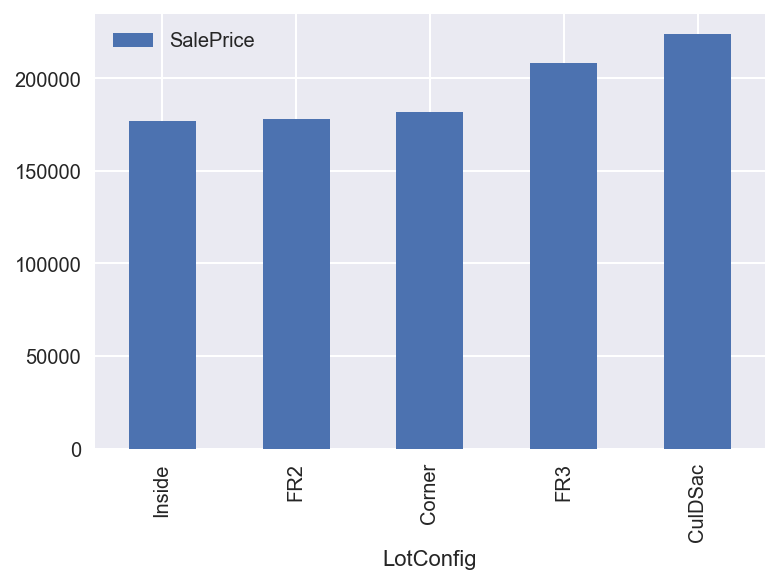

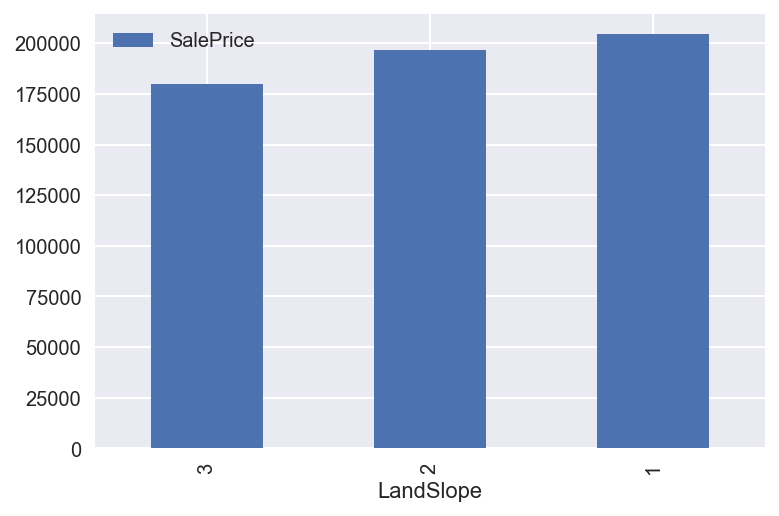

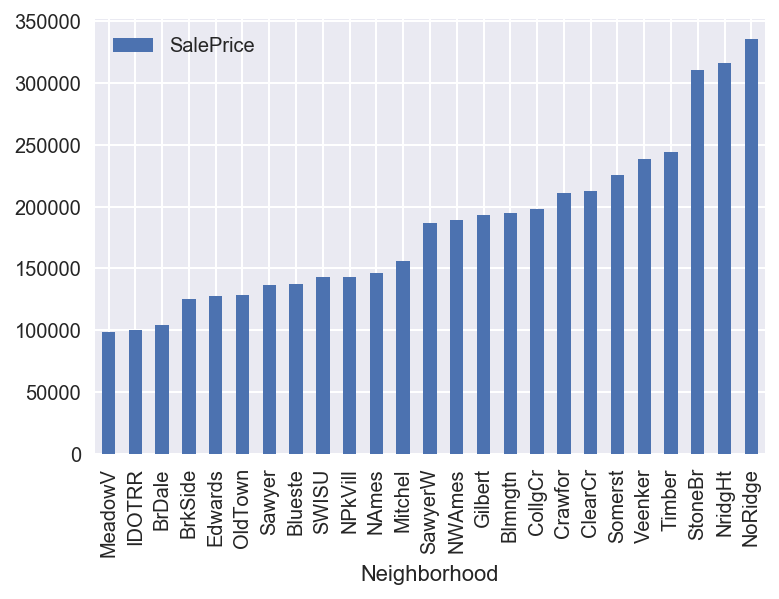

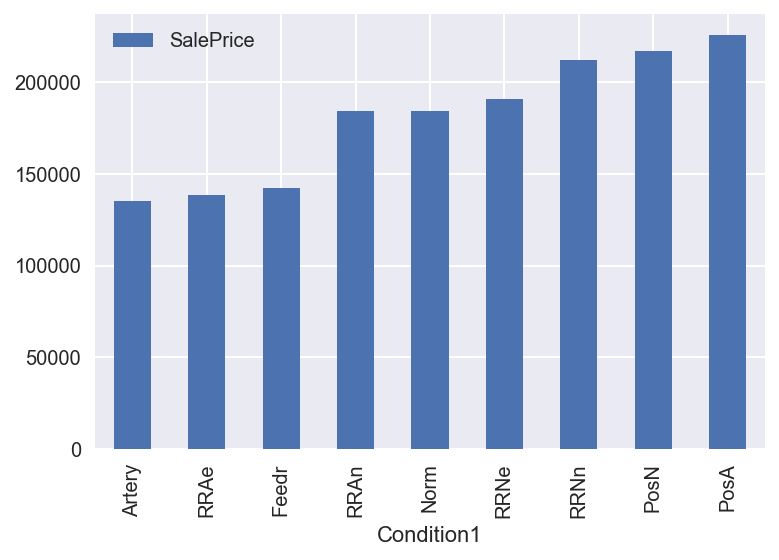

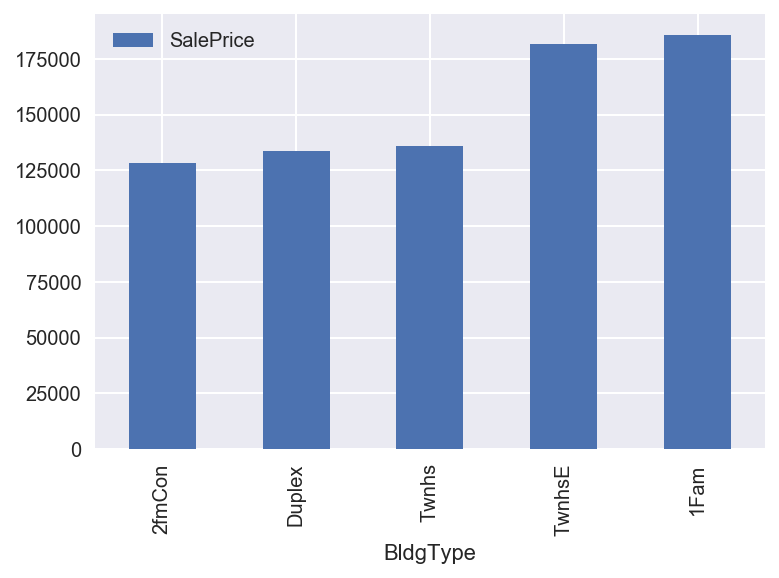

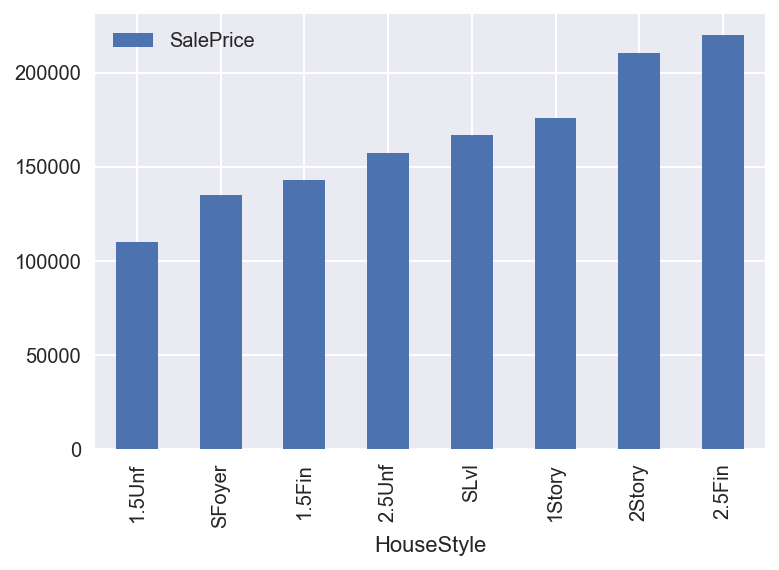

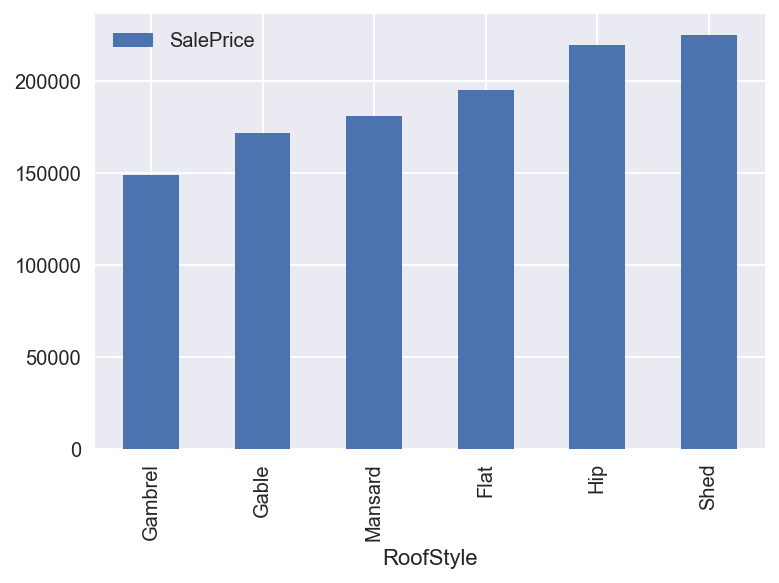

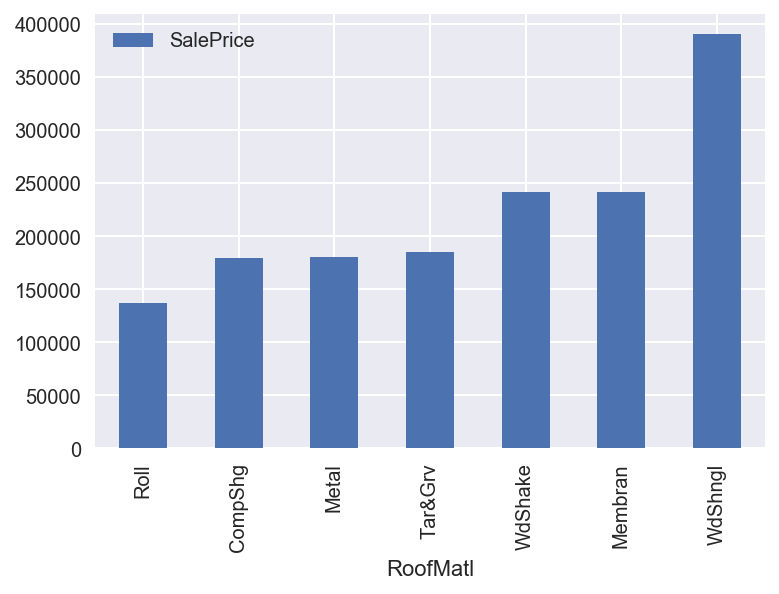

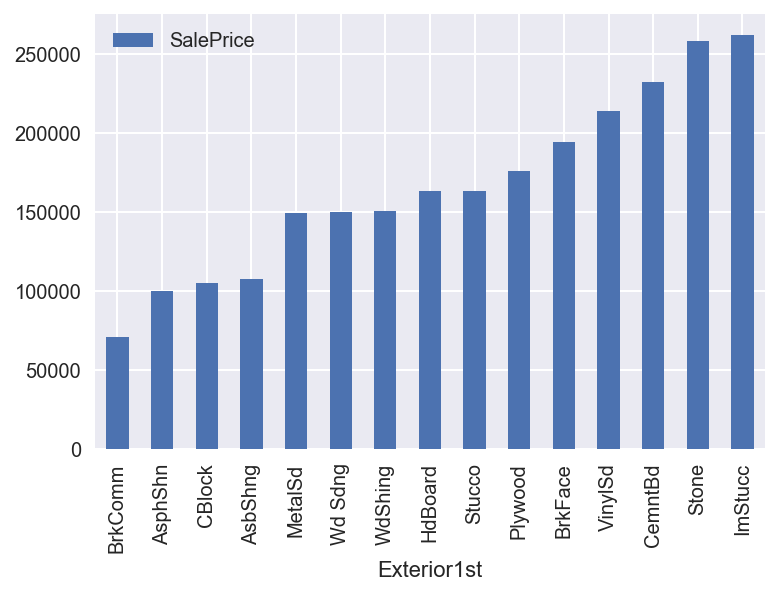

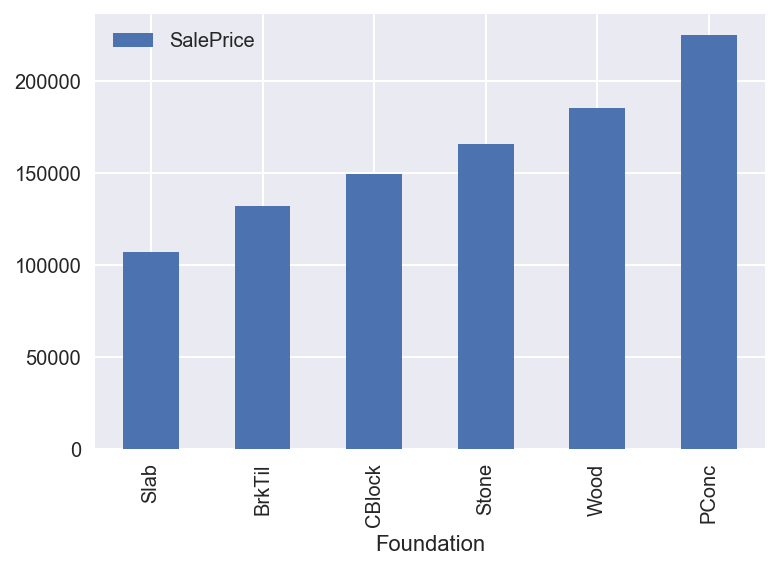

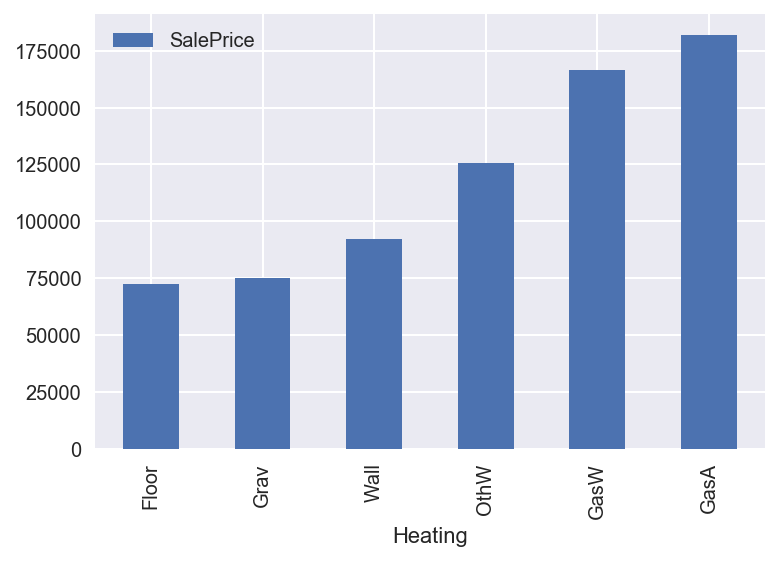

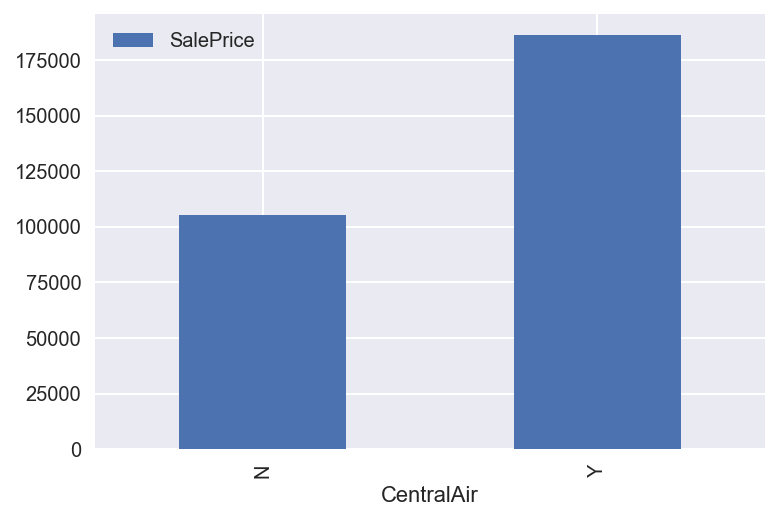

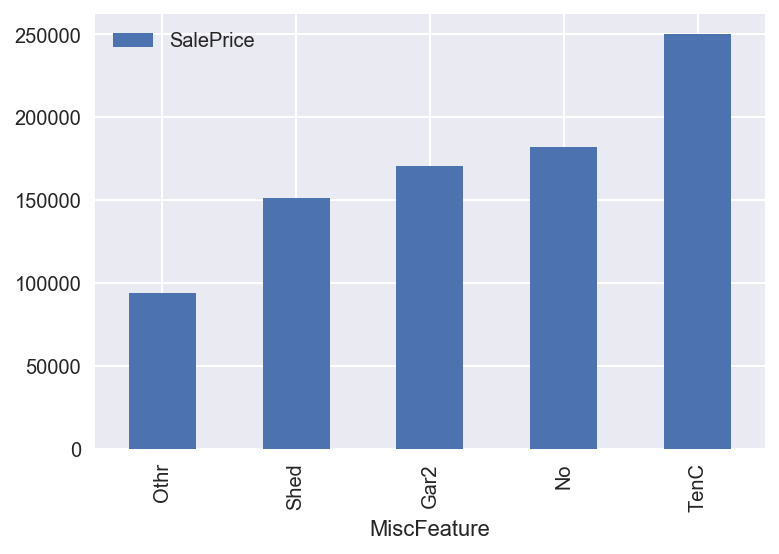

In [28]:
#名義尺度１
order_list=['LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
           'Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Foundation',
           'Heating','CentralAir','MiscFeature']

for i in order_list:
    cut=train_df[[i, 'SalePrice']].groupby([i], as_index=False).mean ().sort_values(by=i, ascending=True)
    cut=cut.sort_values('SalePrice')
    cut.plot.bar(x=i)

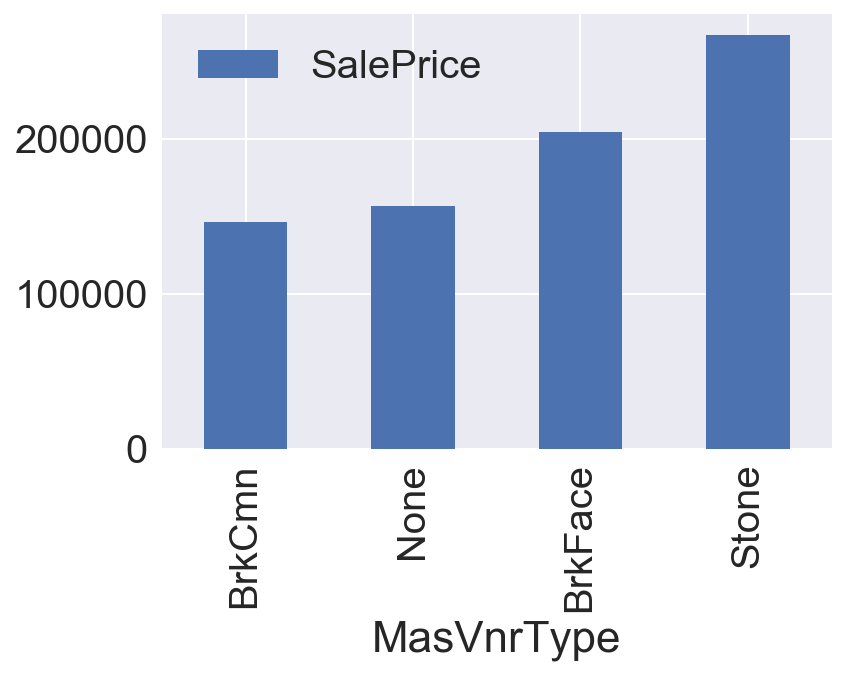

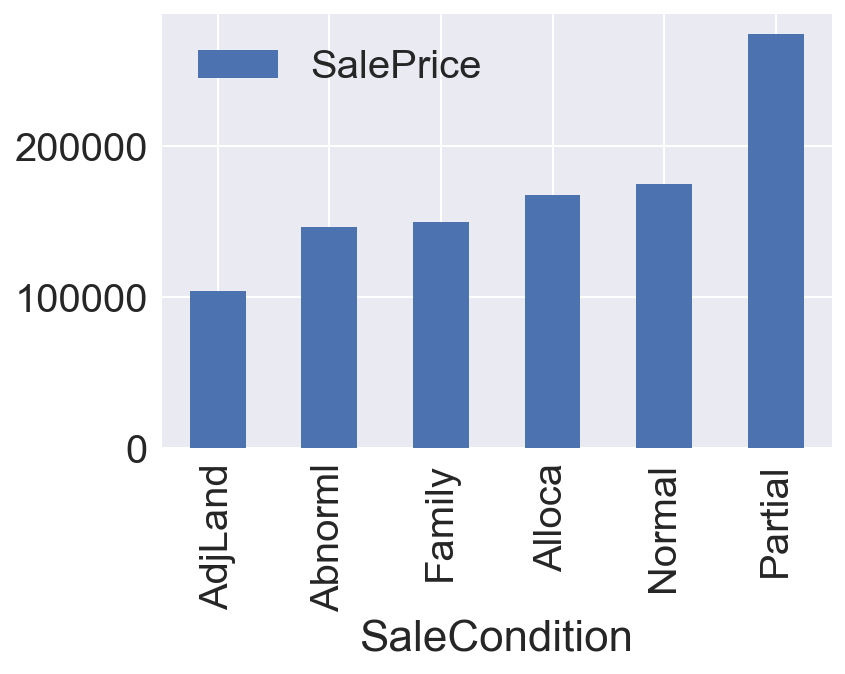

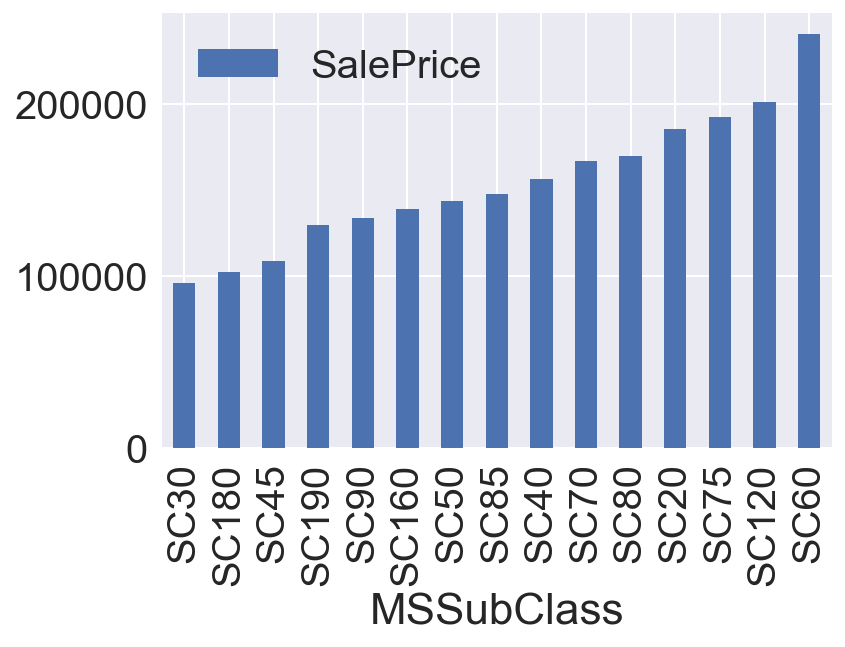

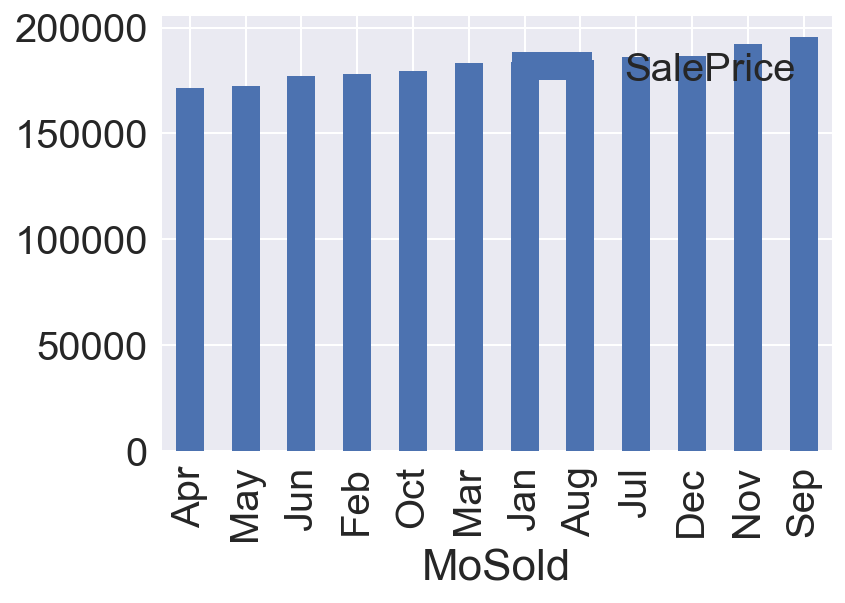

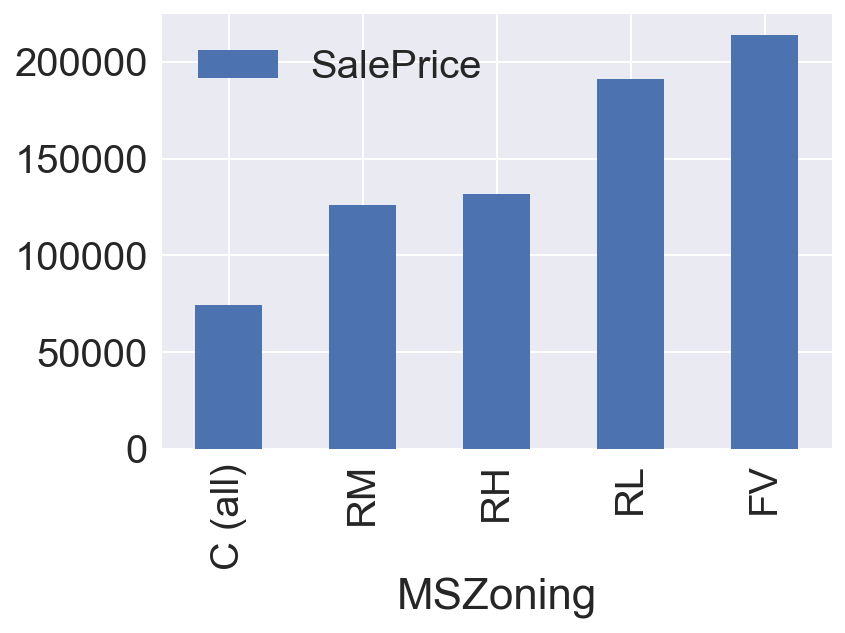

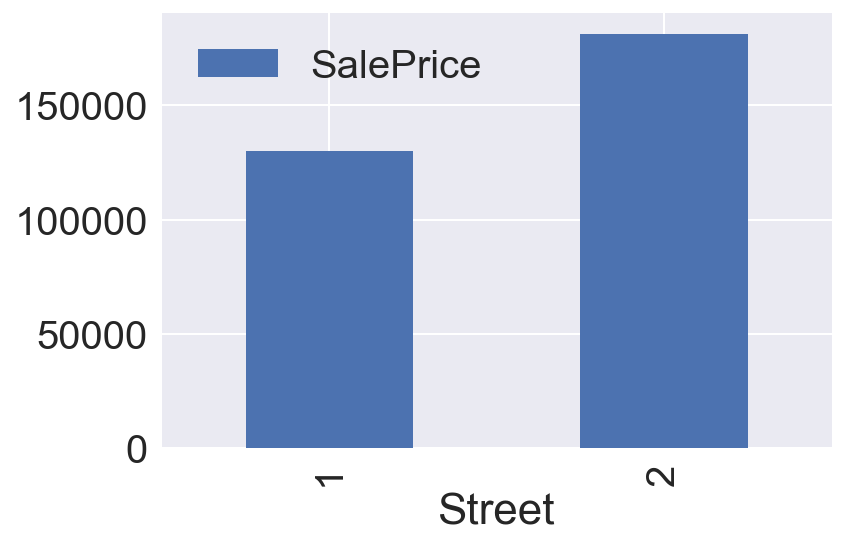

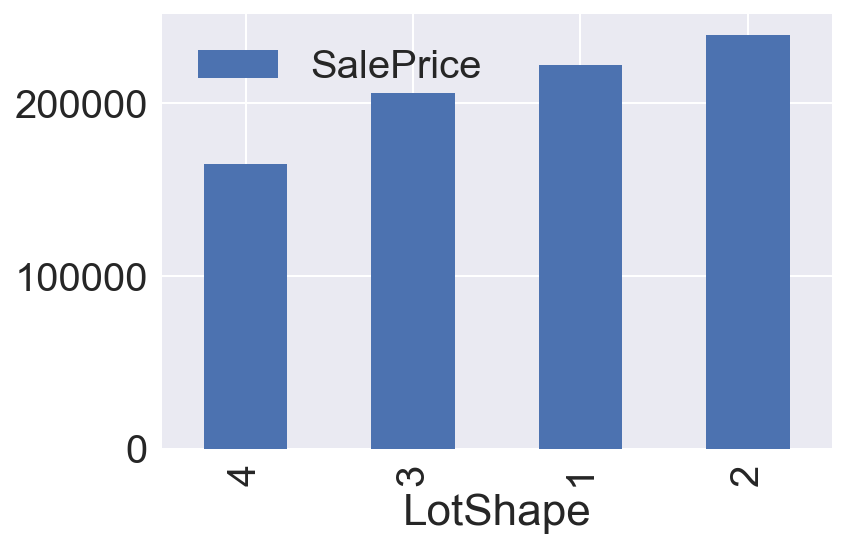

In [1176]:
#名義尺度２
order_list=['MasVnrType','SaleCondition','MSSubClass','MoSold','MSZoning','Street',
           'LotShape']
for i in order_list:
    cut=train_df[[i, 'SalePrice']].groupby([i], as_index=False).mean ().sort_values(by=i, ascending=True)
    cut=cut.sort_values('SalePrice')
    cut.plot.bar(x=i)

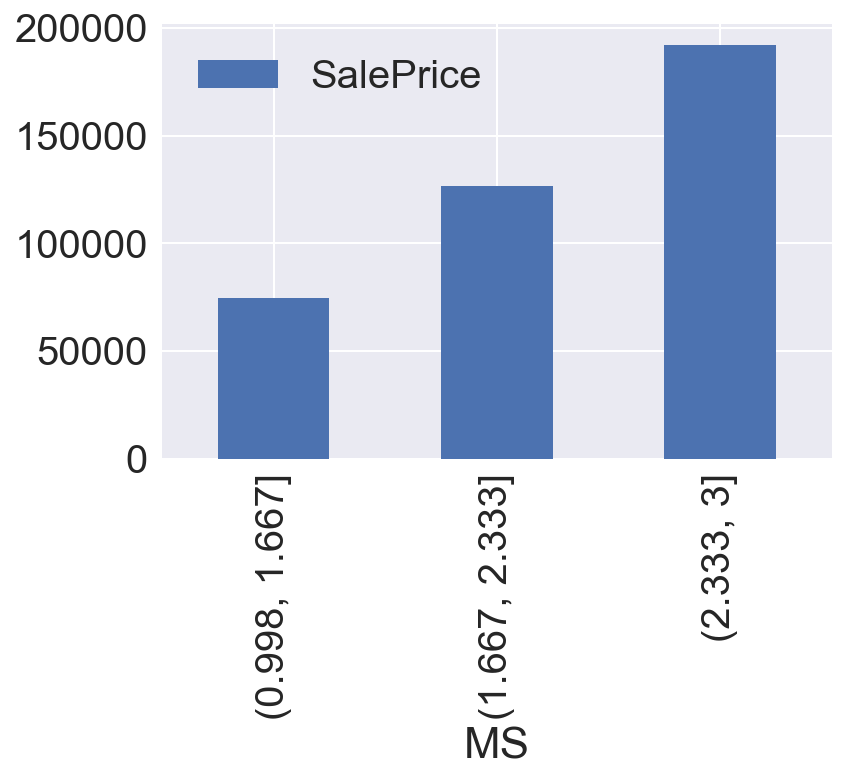

In [1177]:
train_df["SimpleMSZoning"] = train_df.MSZoning.replace({'C (all)' : 1, # bad
                                                   'RM' : 2,'RH' : 2, # average
                                                  'RL' : 3, 'FV' : 3 })# good
test_df["SimpleMSZoning"] = test_df.MSZoning.replace({'C (all)' : 1, # bad
                                                   'RM' : 2,'RH' : 2, # average
                                                  'RL' : 3, 'FV' : 3 })# good


train_df["MS"] = pd.cut (train_df['SimpleMSZoning'],3)
cut_5=train_df[['MS', 'SalePrice']].groupby(['MS'], as_index=False).mean ().sort_values(by='MS', ascending=True)
cut_5.plot.bar(x='MS')
del train_df['MS']                                                     

In [1178]:
#フューチャーエンジニアリング
train_df["OverallGrade"] = train_df["OverallQual"] * train_df["OverallCond"]
# Overall quality of the garage
train_df["GarageGrade"] = train_df["GarageQual"] * train_df["GarageCond"]
# Overall quality of the exterior
train_df["ExterGrade"] = train_df["ExterQual"] * train_df["ExterCond"]
# Overall kitchen score
train_df["KitchenScore"] = train_df["KitchenAbvGr"] * train_df["KitchenQual"]
# Overall fireplace score
train_df["FireplaceScore"] = train_df["Fireplaces"] * train_df["FireplaceQu"]
# Overall garage score
train_df["GarageScore"] = train_df["GarageArea"] * train_df["GarageQual"]
# Overall pool score
train_df["PoolScore"] = train_df["PoolArea"] * train_df["PoolQC"]
# Simplified overall quality of the house
train_df["SimplOverallGrade"] = train_df["SimplOverallQual"] * train_df["SimplOverallCond"]
# Simplified overall quality of the exterior
#train_df["SimplExterGrade"] = train_df["SimplExterQual"] * train_df["SimplExterCond"]
# Simplified overall pool score
#train_df["SimplPoolScore"] = train_df["PoolArea"] * train_df["SimplPoolQC"]
# Simplified overall garage score
train_df["SimplGarageScore"] = train_df["GarageArea"] * train_df["SimplGarageQual"]
# Simplified overall fireplace score
train_df["SimplFireplaceScore"] = train_df["Fireplaces"] * train_df["SimplFireplaceQu"]
# Simplified overall kitchen score
#train_df["SimplKitchenScore"] = train_df["KitchenAbvGr"] * train_df["SimplKitchenQual"]
# Total number of bathrooms
train_df["TotalBath"] = train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]) + \
train_df["FullBath"] + (0.5 * train_df["HalfBath"])
# Total SF for house (incl. basement)
train_df["AllSF"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train_df["AllFlrsSF"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"]
# Total SF for porch
train_df["AllPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + \
train_df["3SsnPorch"] + train_df["ScreenPorch"]
# Has masonry veneer or not
train_df["HasMasVnr"] = train_df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train_df["BoughtOffPlan"] = train_df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})


In [1179]:
#テストデータフューチャーエンジニアリング
test_df["OverallGrade"] = test_df["OverallQual"] * test_df["OverallCond"]
# Overall quality of the garage
test_df["GarageGrade"] = test_df["GarageQual"] * test_df["GarageCond"]
# Overall quality of the exterior
test_df["ExterGrade"] = test_df["ExterQual"] * test_df["ExterCond"]
# Overall kitchen score
test_df["KitchenScore"] = test_df["KitchenAbvGr"] * test_df["KitchenQual"]
# Overall fireplace score
test_df["FireplaceScore"] = test_df["Fireplaces"] * test_df["FireplaceQu"]
# Overall garage score
test_df["GarageScore"] = test_df["GarageArea"] * test_df["GarageQual"]
# Overall pool score
test_df["PoolScore"] = test_df["PoolArea"] * test_df["PoolQC"]
# Simplified overall quality of the house
test_df["SimplOverallGrade"] = test_df["SimplOverallQual"] * test_df["SimplOverallCond"]
# Simplified overall quality of the exterior
#test_df["SimplExterGrade"] = test_df["SimplExterQual"] * test_df["SimplExterCond"]
# Simplified overall pool score
#test_df["SimplPoolScore"] = test_df["PoolArea"] * test_df["SimplPoolQC"]
# Simplified overall garage score
test_df["SimplGarageScore"] = test_df["GarageArea"] * test_df["SimplGarageQual"]
# Simplified overall fireplace score
test_df["SimplFireplaceScore"] = test_df["Fireplaces"] * test_df["SimplFireplaceQu"]
# Simplified overall kitchen score
#test_df["SimplKitchenScore"] = test_df["KitchenAbvGr"] * test_df["SimplKitchenQual"]
# Total number of bathrooms
test_df["TotalBath"] = test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"]) + \
test_df["FullBath"] + (0.5 * test_df["HalfBath"])
# Total SF for house (incl. basement)
test_df["AllSF"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
test_df["AllFlrsSF"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"]
# Total SF for porch
test_df["AllPorchSF"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + \
test_df["3SsnPorch"] + test_df["ScreenPorch"]
# Has masonry veneer or not
test_df["HasMasVnr"] = test_df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
test_df["BoughtOffPlan"] = test_df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

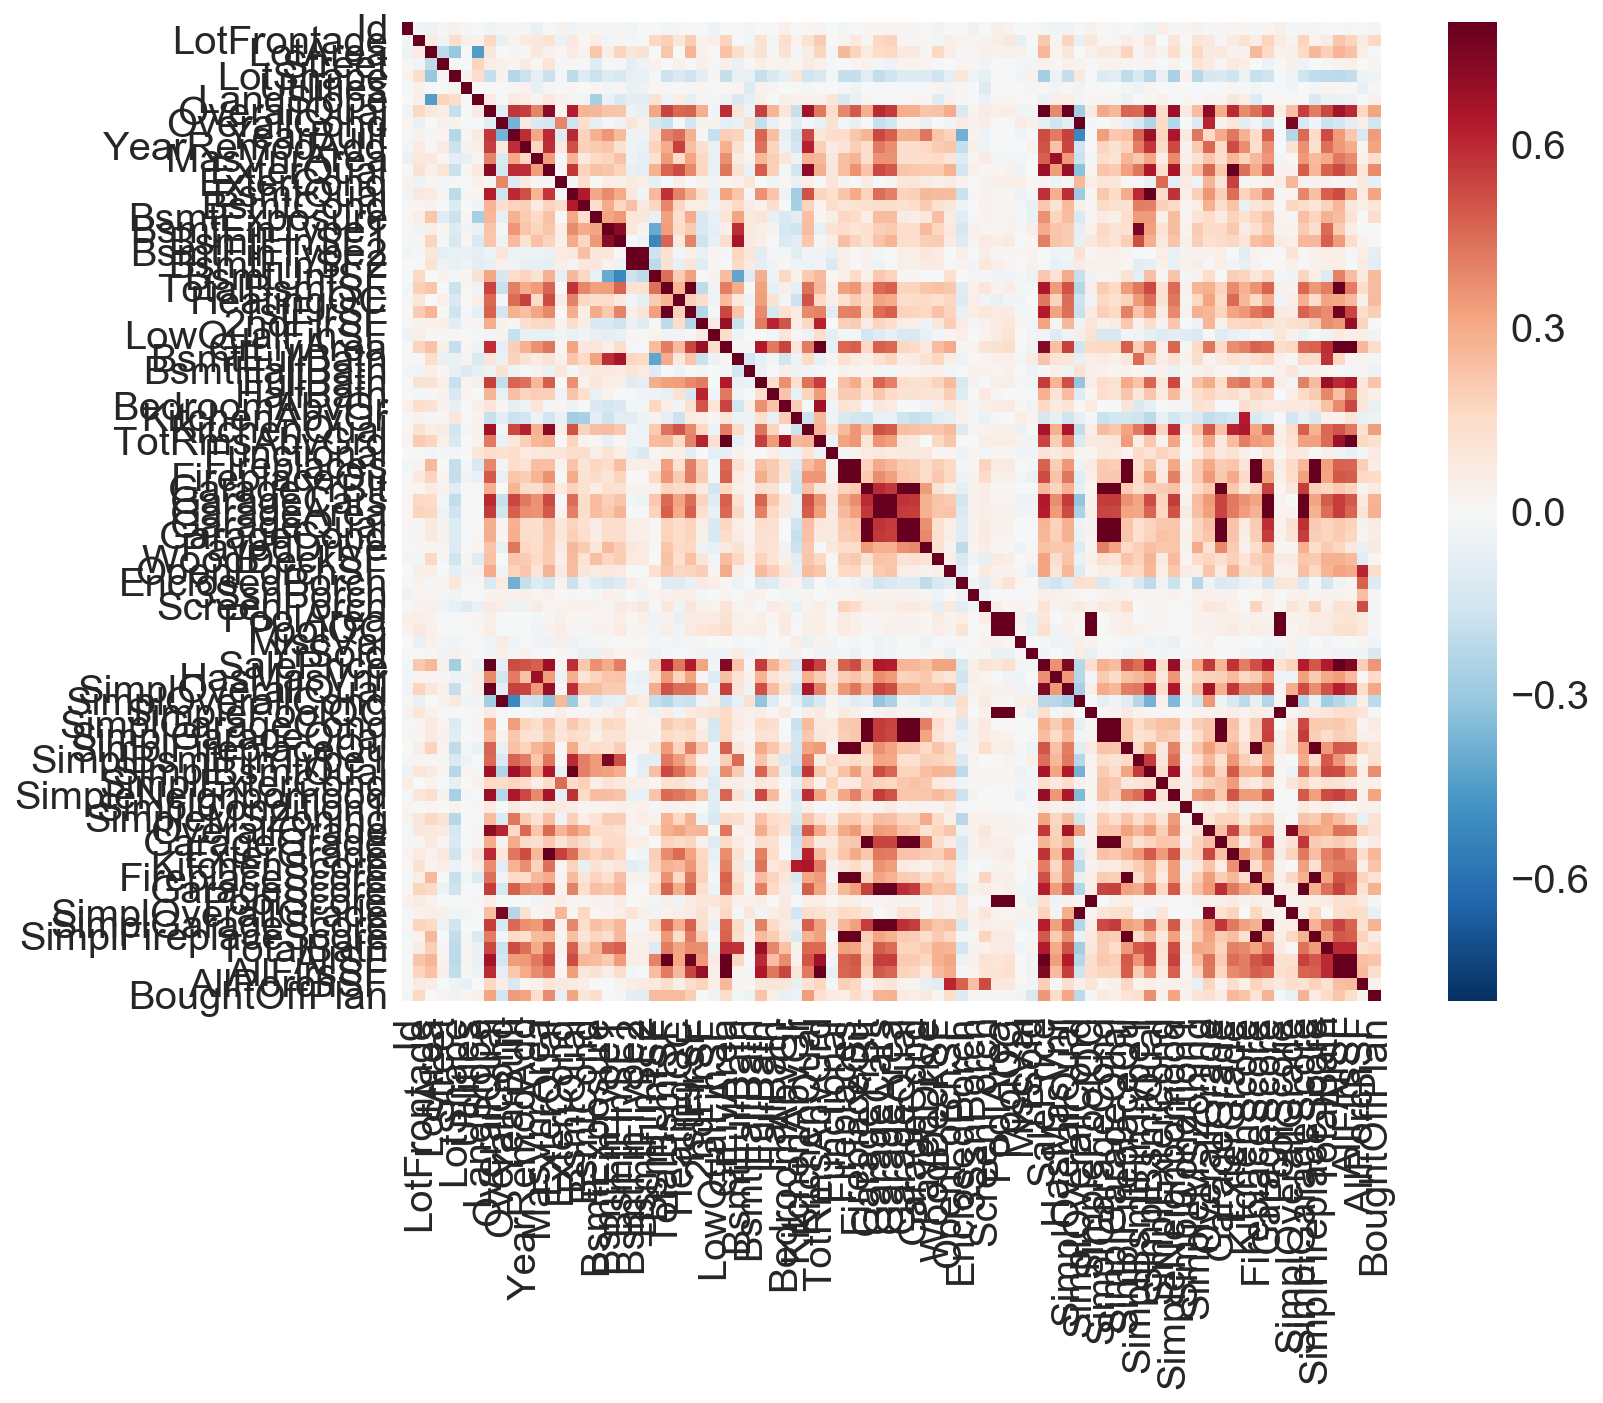

In [1180]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

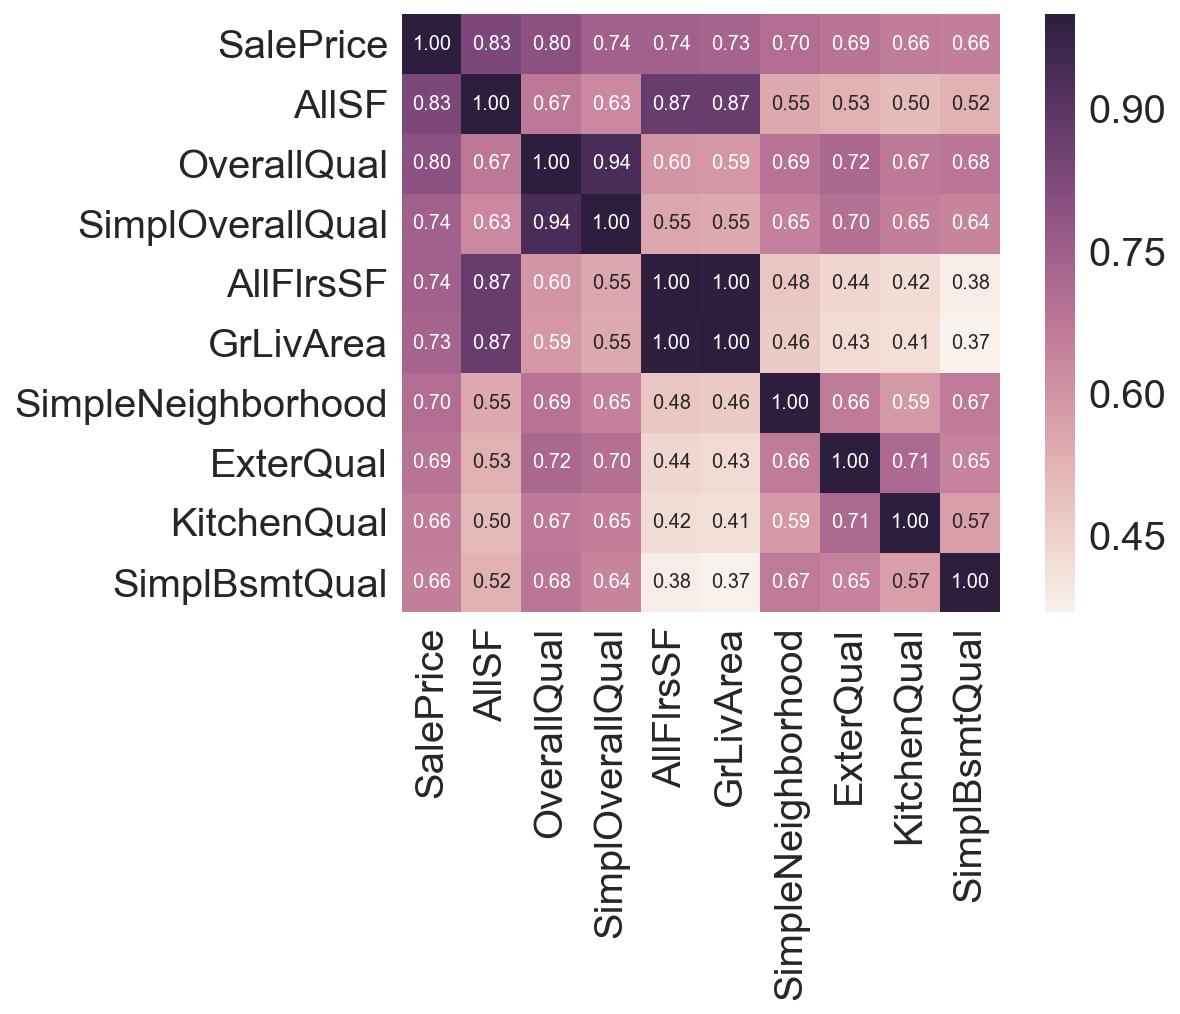

In [1181]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=2.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1182]:
train_df["OverallQual-s2"] = train_df["OverallQual"] ** 2
train_df["OverallQual-s3"] = train_df["OverallQual"] ** 3
train_df["OverallQual-Sq"] = np.sqrt(train_df["OverallQual"])
train_df["AllSF-2"] = train_df["AllSF"] ** 2
train_df["AllSF-3"] = train_df["AllSF"] ** 3
train_df["AllSF-Sq"] = np.sqrt(train_df["AllSF"])
train_df["AllFlrsSF-2"] = train_df["AllFlrsSF"] ** 2
train_df["AllFlrsSF-3"] = train_df["AllFlrsSF"] ** 3
train_df["AllFlrsSF-Sq"] = np.sqrt(train_df["AllFlrsSF"])
train_df["GrLivArea-2"] = train_df["GrLivArea"] ** 2
train_df["GrLivArea-3"] = train_df["GrLivArea"] ** 3
train_df["GrLivArea-Sq"] = np.sqrt(train_df["GrLivArea"])
train_df["SimplOverallQual-s2"] = train_df["SimplOverallQual"] ** 2
train_df["SimplOverallQual-s3"] = train_df["SimplOverallQual"] ** 3
train_df["SimplOverallQual-Sq"] = np.sqrt(train_df["SimplOverallQual"])
train_df["ExterQual-2"] = train_df["ExterQual"] ** 2
train_df["ExterQual-3"] = train_df["ExterQual"] ** 3
train_df["ExterQual-Sq"] = np.sqrt(train_df["ExterQual"])
train_df["KitchenQual-2"] = train_df["KitchenQual"] ** 2
train_df["KitchenQual-3"] = train_df["KitchenQual"] ** 3
train_df["KitchenQual-Sq"] = np.sqrt(train_df["KitchenQual"])
train_df["SimpleNeighborhood-s2"] = train_df["SimpleNeighborhood"] ** 2
train_df["SimpleNeighborhood-s3"] = train_df["SimpleNeighborhood"] ** 3
train_df["SimpleNeighborhood-Sq"] = np.sqrt(train_df["SimpleNeighborhood"])
train_df["SimplBsmtQual-s2"] = train_df["SimplBsmtQual"] ** 2
train_df["SimplBsmtQual-s3"] = train_df["SimplBsmtQual"] ** 3
train_df["SimplBsmtQual-Sq"] = np.sqrt(train_df["SimplBsmtQual"])

In [1183]:
test_df["OverallQual-s2"] = test_df["OverallQual"] ** 2
test_df["OverallQual-s3"] = test_df["OverallQual"] ** 3
test_df["OverallQual-Sq"] = np.sqrt(test_df["OverallQual"])
test_df["AllSF-2"] = test_df["AllSF"] ** 2
test_df["AllSF-3"] = test_df["AllSF"] ** 3
test_df["AllSF-Sq"] = np.sqrt(test_df["AllSF"])
test_df["AllFlrsSF-2"] = test_df["AllFlrsSF"] ** 2
test_df["AllFlrsSF-3"] = test_df["AllFlrsSF"] ** 3
test_df["AllFlrsSF-Sq"] = np.sqrt(test_df["AllFlrsSF"])
test_df["GrLivArea-2"] = test_df["GrLivArea"] ** 2
test_df["GrLivArea-3"] = test_df["GrLivArea"] ** 3
test_df["GrLivArea-Sq"] = np.sqrt(test_df["GrLivArea"])
test_df["SimplOverallQual-s2"] = test_df["SimplOverallQual"] ** 2
test_df["SimplOverallQual-s3"] = test_df["SimplOverallQual"] ** 3
test_df["SimplOverallQual-Sq"] = np.sqrt(test_df["SimplOverallQual"])
test_df["ExterQual-2"] = test_df["ExterQual"] ** 2
test_df["ExterQual-3"] = test_df["ExterQual"] ** 3
test_df["ExterQual-Sq"] = np.sqrt(test_df["ExterQual"])
test_df["KitchenQual-2"] = test_df["KitchenQual"] ** 2
test_df["KitchenQual-3"] = test_df["KitchenQual"] ** 3
test_df["KitchenQual-Sq"] = np.sqrt(test_df["KitchenQual"])
test_df["SimpleNeighborhood-s2"] = test_df["SimpleNeighborhood"] ** 2
test_df["SimpleNeighborhood-s3"] = test_df["SimpleNeighborhood"] ** 3
test_df["SimpleNeighborhood-Sq"] = np.sqrt(test_df["SimpleNeighborhood"])
test_df["SimplBsmtQual-s2"] = test_df["SimplBsmtQual"] ** 2
test_df["SimplBsmtQual-s3"] = test_df["SimplBsmtQual"] ** 3
test_df["SimplBsmtQual-Sq"] = np.sqrt(test_df["SimplBsmtQual"])

In [1184]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice                1.000000
AllSF-2                  0.839303
OverallQual-s3           0.835920
AllSF                    0.829224
OverallQual-s2           0.824681
AllSF-Sq                 0.806451
AllSF-3                  0.801232
OverallQual              0.795863
SimplOverallQual-s3      0.783292
SimplOverallQual-s2      0.771922
OverallQual-Sq           0.771658
AllFlrsSF-2              0.744708
SimplOverallQual         0.744652
AllFlrsSF                0.744057
GrLivArea                0.734962
GrLivArea-2              0.730807
AllFlrsSF-Sq             0.730246
GrLivArea-Sq             0.723147
SimplOverallQual-Sq      0.723000
SimpleNeighborhood-s2    0.714668
AllFlrsSF-3              0.704833
SimpleNeighborhood-s3    0.704229
SimpleNeighborhood       0.703935
ExterQual-3              0.697019
ExterQual-2              0.694676
SimpleNeighborhood-Sq    0.691682
GrLivArea-3              0.688000
ExterQual                0.686795


In [1185]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
SimplBsmtQual-Sq,0,0.0
Electrical,0,0.0
BsmtHalfBath,0,0.0
BsmtFullBath,0,0.0
GrLivArea,0,0.0


In [1186]:
NTrain_df=train_df
NTest_df=test_df
NTrain_df.to_csv('NTrain_df.csv', index=False, encoding='utf-8')
NTest_df.to_csv('NTest_df.csv', index=False, encoding='utf-8')

In [1187]:
#連続値の変数をリストに格納
numerical_list=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
               'GarageArea','OpenPorchSF','GarageScore','SimplGarageScore','AllSF','AllFlrsSF','AllPorchSF']
#numerical_features = train_df.describe().columns
#numerical_features = numerical_features.drop("SalePrice")
#numerical_features = numerical_features.drop('Id')
train_num = train_df[numerical_list]
train_num.head(1)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,OpenPorchSF,GarageScore,SimplGarageScore,AllSF,AllFlrsSF,AllPorchSF
0,65.0,8450,196.0,706,150,856,856,854,1710,548,61,1644,1096,2566,1710,61


In [1188]:
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #train_df[feat] += 1
    train_df[feat] = boxcox1p(train_df[feat], lam)
    test_df[feat]  = boxcox1p(test_df[feat],lam)

There are 11 skewed numerical features to Box Cox transform


C:\Users\sensho\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


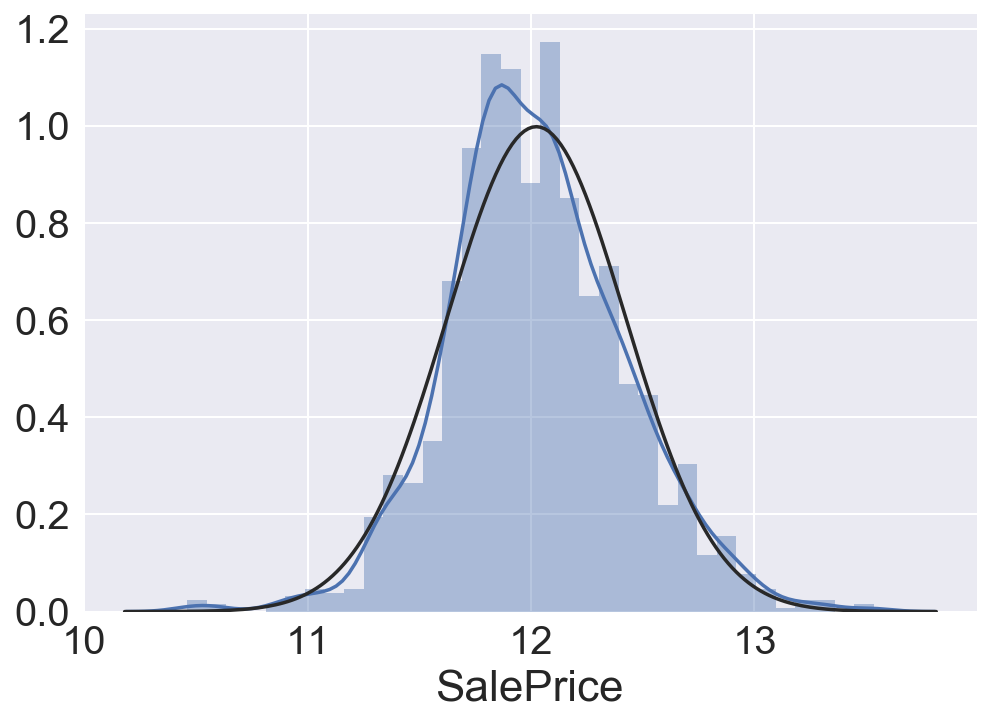

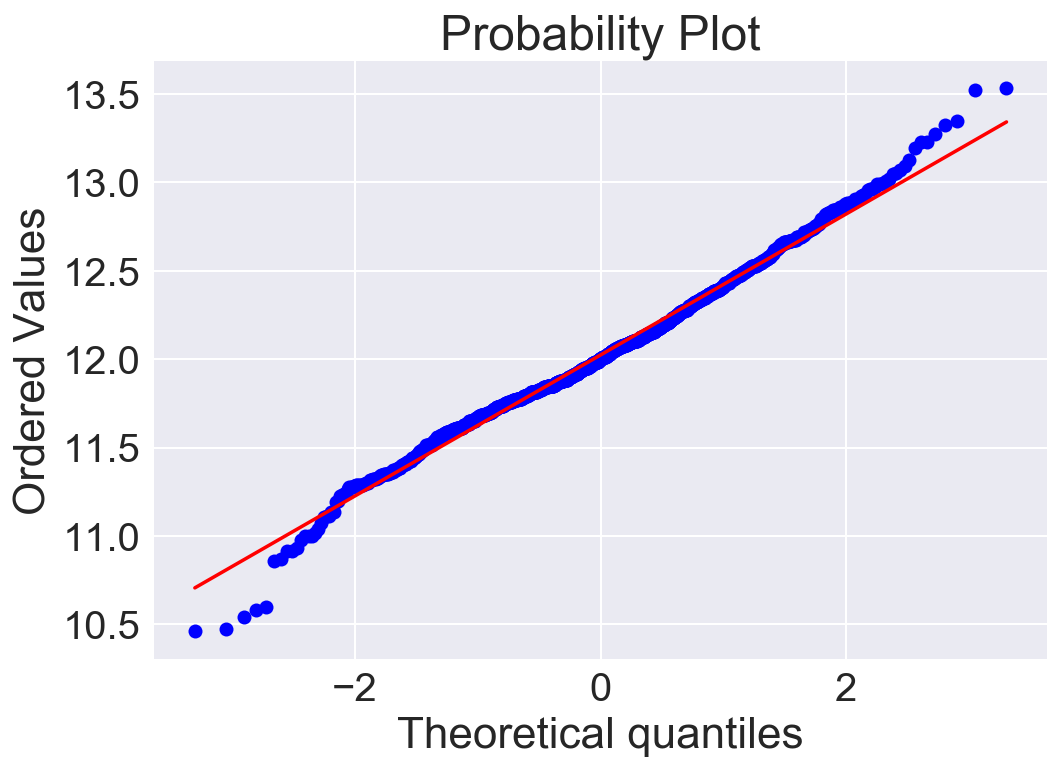

In [1189]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])
#train_df['SalePrice']=np.sqrt(train_df['SalePrice'])
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [1190]:
Ntrain_df=train_df
Ntest_df=test_df

In [1191]:
Ntrain_df.to_csv('Gausian_df.csv', index=False, encoding='utf-8')
Ntest_df.to_csv('Gausian_test_df.csv',index=False,encoding='utf-8')